#  Maleware Classification using bytes files

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df_bytes = pd.read_csv('C:\\Users\\Vipul Singh\\Desktop\\train (1)\\Bytes.csv')
df_bytes.head()

,ID,00,01,02,03,04,05,06,07,08,...,f9,fa,fb,fc,fd,fe,ff,??,size_bytes,Class
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,3101,3211,3097,2758,3099,2759,5753,1824,5256192,9
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,439,281,302,7639,518,17001,54902,8588,6874624,2
2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,9107,...,2242,2885,2863,2471,2786,2680,49144,468,4825600,9
3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,1078,...,485,462,516,1133,471,761,7998,13940,712704,1
4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,422,...,350,209,239,653,221,242,2199,9008,460288,8


In [3]:
Y = df_bytes['Class']
X = df_bytes.drop(['ID', 'Class'], axis = 1)

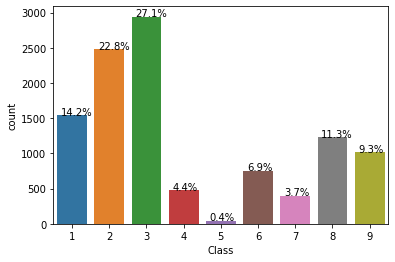

In [4]:
# Class distribution of data
ax = sns.countplot(x = 'Class', data = df_bytes)

for c, p in enumerate(ax.patches):
    ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df_bytes)), (p.get_x()+0.1, p.get_height()+5))   

plt.show(ax)

Data for Class 5, 4, 7 is very less.<br>
Data for Class 3, 2, 1 is very large.

### Analysis of size

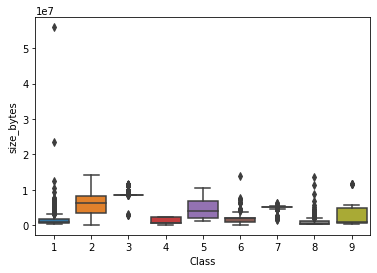

In [5]:
sns.boxplot(data = df_bytes, x = 'Class', y = 'size_bytes')
plt.show()

<AxesSubplot:ylabel='size_bytes'>

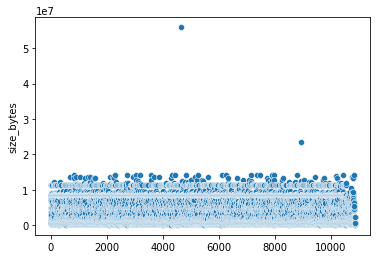

In [7]:
sns.scatterplot( x = df_bytes.index, y = df_bytes.size_bytes,)

## Split train Val and Test set

In [8]:
# Split the data
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.3)

## Model using bytes files

### 1. XgBoost Classifier

In [9]:
# xgboost model
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train, y_train)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val) )

loss_c = log_loss(y_val, sig_clf.predict_proba(x_val) )

print('Train error for xgboost is ', log_loss(y_train, clf.predict_proba(x_train)))
print('Cross Validation error for xgboost is ',loss)

print('Train error for xgboost with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train)))
print('Cross Validation error for xgboost with calliberation is ',loss_c)

c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:14:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:14:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:15:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train error for xgboost is  0.0009244922284258935
Cross Validation error for xgboost is  0.04310740307429337
Train error for xgboost with calliberation is  0.022440167956136396
Cross Validation error for xgboost with calliberation is  0.06557363734188314


### 2. LightGBM Classifier

In [12]:
# LightGBM model
clf = LGBMClassifier()
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train, y_train)


# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val))

print('Train error for LightGBM Classifier is ', log_loss(y_train, clf.predict_proba(x_train)))
print('Cross Validation error for LightGBM Classifier is ',loss)

print('Train error for LightGBM Classifier with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train)))
print('Cross Validation error for LightGBM Classifier with calliberation is ',loss_c)

Train error for LightGBM Classifier is  2.603933895557233e-06
Cross Validation error for LightGBM Classifier is  0.05293871465955139
Train error for LightGBM Classifier with calliberation is  0.02117173045354391
Cross Validation error for LightGBM Classifier with calliberation is  0.06069275661383898


### 3. Random Forest Classifier

In [13]:
# RandomForest model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train, y_train)

# predict probability
y_probs = sig_clf.predict_proba(x_val)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val))

print('Train error for Random Forest Classifier is ', log_loss(y_train, clf.predict_proba(x_train)))
print('Cross Validation error for Random Forest Classifier is ',loss)

print('Train error for Random Forest Classifier with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train)))
print('Cross Validation error for Random Forest Classifier with calliberation is ',loss_c)

Train error for Random Forest Classifier is  0.027537508369056378
Cross Validation error for Random Forest Classifier is  0.09967721792286391
Train error for Random Forest Classifier with calliberation is  0.02558939515088649
Cross Validation error for Random Forest Classifier with calliberation is  0.06750238635683


### 4. Logistic Regression

In [14]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

x_train_s = s.fit_transform(X = x_train)
x_val_s = s.transform(x_val)

In [17]:
# Logistic Regression model
clf = LogisticRegression(penalty='l2',class_weight='balanced', max_iter = 1500)
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train_s, y_train)

# predict probability
y_probs = clf.predict_proba(x_val_s)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val_s))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val_s))

print('Train error for LogisticRegression is ', log_loss(y_train, clf.predict_proba(x_train_s)))
print('Cross Validation error for LogisticRegression is ',loss)

print('Train error for LogisticRegression with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train_s)))
print('Cross Validation error for LogisticRegression with calliberation is ',loss_c)

c:\users\public\anaconda3\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train error for LogisticRegression is  2.196120061240388
Cross Validation error for LogisticRegression is  2.1961130345094033
Train error for LogisticRegression with calliberation is  0.9906380382153519
Cross Validation error for LogisticRegression with calliberation is  1.0019339185504255


### 5. Decision Tree

In [18]:
# Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train, y_train)

# predict probability
y_probs = sig_clf.predict_proba(x_val)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val))

print('Train error for Decision Tree Classifier is ', log_loss(y_train, clf.predict_proba(x_train)))
print('Cross Validation error for Decision Tree Classifier is ',loss)

print('Train error for Decision Tree Classifier with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train)))
print('Cross Validation error for Decision Tree Classifier with calliberation is ',loss_c)

Train error for Decision Tree Classifier is  8.104628079763677e-15
Cross Validation error for Decision Tree Classifier is  1.408665213285234
Train error for Decision Tree Classifier with calliberation is  0.0629306299093547
Cross Validation error for Decision Tree Classifier with calliberation is  0.14412437244507287


### 6. GaussianNB

In [21]:
# GaussianNB model
clf = GaussianNB()
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train_s, y_train)

# predict probability
y_probs = clf.predict_proba(x_val_s)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val_s))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val_s))

print('Train error for GaussianNB is ', log_loss(y_train, clf.predict_proba(x_train_s)))
print('Cross Validation error for GaussianNB is ',loss)

print('Train error for GaussianNB with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train_s)))
print('Cross Validation error for GaussianNB with calliberation is ',loss_c)

Train error for GaussianNB is  30.606795277782705
Cross Validation error for GaussianNB is  30.70466506251031
Train error for GaussianNB with calliberation is  1.1256327425129629
Cross Validation error for GaussianNB with calliberation is  1.1178911154655091


### 7. Support Vector

In [25]:
# Support vector model
clf = SVC(probability = True)
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train_s, y_train)

# predict probability
y_probs = clf.predict_proba(x_val_s)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val_s))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val_s))

print('Train error for SVC is ', log_loss(y_train, clf.predict_proba(x_train_s)))
print('Cross Validation error for SVC is ',loss)

print('Train error for SVC with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train_s)))
print('Cross Validation error for SVC with calliberation is ',loss_c)

Train error for SVC is  3.119091667469305
Cross Validation error for SVC is  3.1043952594181463
Train error for SVC with calliberation is  0.734782261706861
Cross Validation error for SVC with calliberation is  0.7401606624647641


## Hyper parameter tuning for xgboost

In [44]:
def objective(trial):
    list_trees = [100, 150, 180, 200, 300, 500, 600]
    depth = [3, 4, 5, 6, 7]
    param = {
        'booster' : trial.suggest_categorical('booster', ['gbtree', 'gblinear']),
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.8),
        'n_estimators' : trial.suggest_categorical('n_estimators', list_trees),
        'max_depth' : trial.suggest_categorical('max_depth', depth),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1)
            }
    clf = xgb.XGBClassifier(**param, n_jobs=4)
    clf.fit(x_train.reset_index().drop('index', axis = 1), y_train, )
    return log_loss(y_val, clf.predict_proba(x_val.reset_index().drop('index', axis = 1)))

import optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2021-03-14 11:40:09,145] A new study created in memory with name: no-name-f537170a-e59b-42c9-b87b-c466c3a64e71


[11:40:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:40:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 11:40:30,570] Trial 0 finished with value: 0.6485651143907455 and parameters: {'booster': 'gblinear', 'learning_rate': 0.015636275457700768, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.006414226519250831}. Best is trial 0 with value: 0.6485651143907455.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:40:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 11:41:22,921] Trial 1 finished with value: 1.3331314532239902 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0019863393430575855, 'n_estimators': 200, 'max_depth': 3, 'gamma': 0.41239995159826043}. Best is trial 0 with value: 0.6485651143907455.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 11:41:27,128] Trial 2 finished with value: 0.8019077161402229 and parameters: {'booster': 'gblinear', 'learning_rate': 0.17051629815748606, 'n_estimators': 100, 'max_depth': 6, 'gamma': 0.013052880227972807}. Best is trial 0 with value: 0.6485651143907455.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 11:41:48,287] Trial 3 finished with value: 0.8768460679705092 and parameters: {'booster': 'gblinear', 'learning_rate': 0.0021562803733439764, 'n_estimators': 500, 'max_depth': 5, 'gamma': 0.738739251827134}. Best is trial 0 with value: 0.6485651143907455.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 11:44:40,340] Trial 4 finished with value: 1.038813821763504 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0012055642057660573, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.019846101075192715}. Best is trial 0 with value: 0.6485651143907455.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 11:44:53,468] Trial 5 finished with value: 0.919993555964058 and parameters: {'booster': 'gblinear', 'learning_rate': 0.002945927635952226, 'n_estimators': 300, 'max_depth': 6, 'gamma': 0.3802690946836468}. Best is trial 0 with value: 0.6485651143907455.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:44:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:44:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 11:45:00,329] Trial 6 finished with value: 0.6404720658966232 and parameters: {'booster': 'gblinear', 'learning_rate': 0.04642161134038192, 'n_estimators': 150, 'max_depth': 5, 'gamma': 0.003469953779551092}. Best is trial 6 with value: 0.6404720658966232.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:45:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 11:45:38,457] Trial 7 finished with value: 0.0664705074375409 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0558694516037285, 'n_estimators': 150, 'max_depth': 3, 'gamma': 0.001055263910321785}. Best is trial 7 with value: 0.0664705074375409.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:45:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 11:46:57,843] Trial 8 finished with value: 0.21795828763152222 and parameters: {'booster': 'gbtree', 'learning_rate': 0.01039555008143208, 'n_estimators': 300, 'max_depth': 3, 'gamma': 0.08131093714177984}. Best is trial 7 with value: 0.0664705074375409.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 11:49:01,350] Trial 9 finished with value: 0.04663604803431937 and parameters: {'booster': 'gbtree', 'learning_rate': 0.21262194145608326, 'n_estimators': 500, 'max_depth': 4, 'gamma': 0.49425486815407904}. Best is trial 9 with value: 0.04663604803431937.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:49:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 11:50:55,938] Trial 10 finished with value: 0.045291072580321515 and parameters: {'booster': 'gbtree', 'learning_rate': 0.4464050722620549, 'n_estimators': 600, 'max_depth': 7, 'gamma': 0.0976173615955861}. Best is trial 10 with value: 0.045291072580321515.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:50:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 11:56:11,846] Trial 11 finished with value: 0.0513325360470267 and parameters: {'booster': 'gbtree', 'learning_rate': 0.655873934403306, 'n_estimators': 600, 'max_depth': 7, 'gamma': 0.13664556285714363}. Best is trial 10 with value: 0.045291072580321515.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:56:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:01:06,100] Trial 12 finished with value: 0.046628485085597936 and parameters: {'booster': 'gbtree', 'learning_rate': 0.5680376594934557, 'n_estimators': 600, 'max_depth': 7, 'gamma': 0.08459477515967029}. Best is trial 10 with value: 0.045291072580321515.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:05:07,173] Trial 13 finished with value: 0.0520813505196306 and parameters: {'booster': 'gbtree', 'learning_rate': 0.7414263569253497, 'n_estimators': 600, 'max_depth': 7, 'gamma': 0.06396766342281245}. Best is trial 10 with value: 0.045291072580321515.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:11:44,106] Trial 14 finished with value: 0.04608987828172258 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2753067145711259, 'n_estimators': 600, 'max_depth': 7, 'gamma': 0.1593061973937175}. Best is trial 10 with value: 0.045291072580321515.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:13:55,314] Trial 15 finished with value: 0.04505941562896533 and parameters: {'booster': 'gbtree', 'learning_rate': 0.21699059586201142, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.14739282434832937}. Best is trial 15 with value: 0.04505941562896533.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:13:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:16:37,831] Trial 16 finished with value: 0.04318460671722676 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09057455208180132, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.03517581804412198}. Best is trial 16 with value: 0.04318460671722676.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:16:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:19:16,468] Trial 17 finished with value: 0.04286619464300707 and parameters: {'booster': 'gbtree', 'learning_rate': 0.10596474306533403, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.040770684988275546}. Best is trial 17 with value: 0.04286619464300707.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:22:26,594] Trial 18 finished with value: 0.042911460277694415 and parameters: {'booster': 'gbtree', 'learning_rate': 0.07747532803424721, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.025772017642768517}. Best is trial 17 with value: 0.04286619464300707.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:27:23,735] Trial 19 finished with value: 0.08390636668660201 and parameters: {'booster': 'gbtree', 'learning_rate': 0.02333640894148352, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.007140398656247103}. Best is trial 17 with value: 0.04286619464300707.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:30:24,265] Trial 20 finished with value: 0.04457656254839132 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09717365763609923, 'n_estimators': 180, 'max_depth': 6, 'gamma': 0.03860074115559658}. Best is trial 17 with value: 0.04286619464300707.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:30:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:34:04,698] Trial 21 finished with value: 0.042976429122488606 and parameters: {'booster': 'gbtree', 'learning_rate': 0.07337467550049534, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.03153346233619234}. Best is trial 17 with value: 0.04286619464300707.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:37:15,604] Trial 22 finished with value: 0.042889300222901286 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09321569389095374, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.019163196778688548}. Best is trial 17 with value: 0.04286619464300707.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:37:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:42:21,154] Trial 23 finished with value: 0.05655508708352739 and parameters: {'booster': 'gbtree', 'learning_rate': 0.03319975142129349, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.013750464951674077}. Best is trial 17 with value: 0.04286619464300707.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:45:08,417] Trial 24 finished with value: 0.04212796949823317 and parameters: {'booster': 'gbtree', 'learning_rate': 0.11733826509329463, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.004731024883404782}. Best is trial 24 with value: 0.04212796949823317.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:45:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:47:53,002] Trial 25 finished with value: 0.04378596780519572 and parameters: {'booster': 'gbtree', 'learning_rate': 0.12419700956845155, 'n_estimators': 200, 'max_depth': 5, 'gamma': 0.0026966223932147616}. Best is trial 24 with value: 0.04212796949823317.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:49:17,670] Trial 26 finished with value: 0.04079843337222174 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3801293057766122, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.0017507946108911408}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:49:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:50:20,546] Trial 27 finished with value: 0.04267497140996228 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3989789502569408, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.00105049206120728}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:51:26,378] Trial 28 finished with value: 0.04155748471388354 and parameters: {'booster': 'gbtree', 'learning_rate': 0.37104801785025987, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.0010249432107403782}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:51:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:51:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:51:40,751] Trial 29 finished with value: 1.0227026880510073 and parameters: {'booster': 'gblinear', 'learning_rate': 0.28167716599022374, 'n_estimators': 100, 'max_depth': 4, 'gamma': 0.001794816945903727}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:51:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:52:46,391] Trial 30 finished with value: 0.0428690226392172 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3714350290717982, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.0061127186222751945}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:53:48,464] Trial 31 finished with value: 0.04300219524989379 and parameters: {'booster': 'gbtree', 'learning_rate': 0.41174231968840475, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.001050339815214877}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:54:32,029] Trial 32 finished with value: 0.04768111083585949 and parameters: {'booster': 'gbtree', 'learning_rate': 0.7420566633013944, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.0016407868026492058}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:55:51,677] Trial 33 finished with value: 0.04321295371795439 and parameters: {'booster': 'gbtree', 'learning_rate': 0.1653182385794156, 'n_estimators': 100, 'max_depth': 3, 'gamma': 0.0016737153274534158}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:57:02,265] Trial 34 finished with value: 0.04159016713470602 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3294166885788087, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.003940508035017681}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:57:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:59:28,777] Trial 35 finished with value: 0.04103491688152263 and parameters: {'booster': 'gbtree', 'learning_rate': 0.15624129377960727, 'n_estimators': 200, 'max_depth': 7, 'gamma': 0.004684809328024124}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 12:59:56,980] Trial 36 finished with value: 0.7472672573948754 and parameters: {'booster': 'gblinear', 'learning_rate': 0.009998851701926546, 'n_estimators': 200, 'max_depth': 6, 'gamma': 0.009080373236015755}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:02:16,708] Trial 37 finished with value: 0.04254619788626261 and parameters: {'booster': 'gbtree', 'learning_rate': 0.16124327311739964, 'n_estimators': 200, 'max_depth': 5, 'gamma': 0.0029193966661395154}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:02:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:02:44,851] Trial 38 finished with value: 1.264131803499338 and parameters: {'booster': 'gblinear', 'learning_rate': 0.27135214467955027, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.002013913108742783}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:03:38,674] Trial 39 finished with value: 0.041336710518002966 and parameters: {'booster': 'gbtree', 'learning_rate': 0.5201192091536763, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.0047361755349173635}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:05:19,896] Trial 40 finished with value: 0.0457259393339573 and parameters: {'booster': 'gbtree', 'learning_rate': 0.5240078782685441, 'n_estimators': 300, 'max_depth': 3, 'gamma': 0.010055048469712422}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:06:01,787] Trial 41 finished with value: 0.045833406209287456 and parameters: {'booster': 'gbtree', 'learning_rate': 0.786685111110006, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.004221230523520968}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:06:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:07:11,471] Trial 42 finished with value: 0.04351302411872318 and parameters: {'booster': 'gbtree', 'learning_rate': 0.33531004220516153, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.0025140610175225222}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:07:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:08:44,834] Trial 43 finished with value: 0.04251872937960141 and parameters: {'booster': 'gbtree', 'learning_rate': 0.20762663751806437, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.0013880946426820515}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:11:08,352] Trial 44 finished with value: 0.04224004150506526 and parameters: {'booster': 'gbtree', 'learning_rate': 0.556901954972033, 'n_estimators': 500, 'max_depth': 6, 'gamma': 0.0041962836835707186}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:13:13,805] Trial 45 finished with value: 0.04267724105645659 and parameters: {'booster': 'gbtree', 'learning_rate': 0.16324765508811587, 'n_estimators': 150, 'max_depth': 7, 'gamma': 0.0056096051576460535}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:14:09,054] Trial 46 finished with value: 0.04231270501706796 and parameters: {'booster': 'gbtree', 'learning_rate': 0.4837976360748889, 'n_estimators': 100, 'max_depth': 5, 'gamma': 0.003474382402898186}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:14:37,404] Trial 47 finished with value: 1.2278243080191575 and parameters: {'booster': 'gblinear', 'learning_rate': 0.24450670357996185, 'n_estimators': 200, 'max_depth': 7, 'gamma': 0.0012721110236513778}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:15:48,748] Trial 48 finished with value: 0.0438616873527397 and parameters: {'booster': 'gbtree', 'learning_rate': 0.31984357652959006, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.0082899375937415}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:15:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:16:49,871] Trial 49 finished with value: 0.045485394135864735 and parameters: {'booster': 'gbtree', 'learning_rate': 0.7502203452572338, 'n_estimators': 150, 'max_depth': 4, 'gamma': 0.013393707167582584}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:16:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:25:39,518] Trial 50 finished with value: 0.32550478910091135 and parameters: {'booster': 'gbtree', 'learning_rate': 0.006220700594548817, 'n_estimators': 300, 'max_depth': 7, 'gamma': 0.0022492608052885566}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:29:36,650] Trial 51 finished with value: 0.04180285669749812 and parameters: {'booster': 'gbtree', 'learning_rate': 0.13395697172131607, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.0052395679516951815}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:33:08,553] Trial 52 finished with value: 0.04175998311523033 and parameters: {'booster': 'gbtree', 'learning_rate': 0.13758925816390866, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.003468369713859344}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:36:03,992] Trial 53 finished with value: 0.043319454547832495 and parameters: {'booster': 'gbtree', 'learning_rate': 0.20740105355054203, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.003274002549006825}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:38:08,601] Trial 54 finished with value: 0.04578663690621159 and parameters: {'booster': 'gbtree', 'learning_rate': 0.6036465871280368, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.0037015391783450213}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:38:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:44:32,305] Trial 55 finished with value: 0.0423882406512429 and parameters: {'booster': 'gbtree', 'learning_rate': 0.05208449979734435, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.001283055271601784}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:45:22,173] Trial 56 finished with value: 0.043957567173917626 and parameters: {'booster': 'gbtree', 'learning_rate': 0.42813755232704787, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.0022889736539705163}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:47:55,302] Trial 57 finished with value: 0.07124871250271411 and parameters: {'booster': 'gbtree', 'learning_rate': 0.03880593031923173, 'n_estimators': 200, 'max_depth': 3, 'gamma': 0.007505676544262659}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:50:07,110] Trial 58 finished with value: 0.049241494858975596 and parameters: {'booster': 'gbtree', 'learning_rate': 0.07407538756930708, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.010633375741113038}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:52:53,532] Trial 59 finished with value: 0.04373452942072188 and parameters: {'booster': 'gbtree', 'learning_rate': 0.33530979430293556, 'n_estimators': 600, 'max_depth': 7, 'gamma': 0.006496512278198829}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:52:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:56:05,115] Trial 60 finished with value: 0.042521575927827265 and parameters: {'booster': 'gbtree', 'learning_rate': 0.19886605114699005, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.017840571638164472}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 13:59:39,823] Trial 61 finished with value: 0.04198623804608816 and parameters: {'booster': 'gbtree', 'learning_rate': 0.1363812340970548, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.005073129497440681}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:59:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:04:51,419] Trial 62 finished with value: 0.04222385715657268 and parameters: {'booster': 'gbtree', 'learning_rate': 0.05984573770773578, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.0048993611967664535}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:04:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:07:29,555] Trial 63 finished with value: 0.04083579025327488 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2535931631269643, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.0029801957379253217}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:07:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:09:45,203] Trial 64 finished with value: 0.042026663761780214 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2886193548551585, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.0032934573628682477}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:09:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:10:53,716] Trial 65 finished with value: 0.04275892118776332 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2347588192098174, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.0025468706796427684}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:11:56,796] Trial 66 finished with value: 0.04466593402192863 and parameters: {'booster': 'gbtree', 'learning_rate': 0.47582620841215784, 'n_estimators': 200, 'max_depth': 6, 'gamma': 0.001539150784862689}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:12:48,103] Trial 67 finished with value: 0.04350227686308186 and parameters: {'booster': 'gbtree', 'learning_rate': 0.6476385804954279, 'n_estimators': 180, 'max_depth': 7, 'gamma': 0.0019600482288032873}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:12:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:13:49,022] Trial 68 finished with value: 0.043425305522768534 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3948899801756017, 'n_estimators': 150, 'max_depth': 7, 'gamma': 0.0010267103882910544}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:13:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:20:49,127] Trial 69 finished with value: 1.353796678794304 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0011372519356991615, 'n_estimators': 300, 'max_depth': 5, 'gamma': 0.003072700895863217}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:21:01,891] Trial 70 finished with value: 0.7123600331823523 and parameters: {'booster': 'gblinear', 'learning_rate': 0.024143630621741116, 'n_estimators': 100, 'max_depth': 7, 'gamma': 0.0019843680536674032}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:24:44,826] Trial 71 finished with value: 0.04164483156081133 and parameters: {'booster': 'gbtree', 'learning_rate': 0.1343308133557987, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.004256390943467196}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:24:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:27:45,670] Trial 72 finished with value: 0.041676166137268045 and parameters: {'booster': 'gbtree', 'learning_rate': 0.1754267261908206, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.003845961126726613}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:27:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:30:53,493] Trial 73 finished with value: 0.042812237127989754 and parameters: {'booster': 'gbtree', 'learning_rate': 0.1697019538444848, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.0045609496923612325}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:33:37,542] Trial 74 finished with value: 0.04278357605102224 and parameters: {'booster': 'gbtree', 'learning_rate': 0.26466121029599876, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.007062240240394844}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:35:58,509] Trial 75 finished with value: 0.04260174346193478 and parameters: {'booster': 'gbtree', 'learning_rate': 0.33496630066323313, 'n_estimators': 500, 'max_depth': 7, 'gamma': 0.002668068267858515}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:35:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:37:13,679] Trial 76 finished with value: 0.04141948937416842 and parameters: {'booster': 'gbtree', 'learning_rate': 0.19123994117000712, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.0039042035079156576}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:37:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:37:53,635] Trial 77 finished with value: 0.04220882950887439 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09418404852486877, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.005877918865534967}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:37:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:38:20,221] Trial 78 finished with value: 0.041550749055727726 and parameters: {'booster': 'gbtree', 'learning_rate': 0.23923629019963194, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.011553267316253718}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:38:40,101] Trial 79 finished with value: 0.04563262192041477 and parameters: {'booster': 'gbtree', 'learning_rate': 0.5084917305141987, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.011813748565180084}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:39:05,599] Trial 80 finished with value: 0.04153141954907836 and parameters: {'booster': 'gbtree', 'learning_rate': 0.29784233311894215, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.025416429458881742}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:39:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:39:29,818] Trial 81 finished with value: 0.04188902315342001 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3076890463226973, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.01733677450237811}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:39:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:39:52,703] Trial 82 finished with value: 0.041530189754449394 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3819478702548178, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.015400253659979981}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:40:19,845] Trial 83 finished with value: 0.043600588867572475 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3809333105309479, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.05097339975100504}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:40:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:40:48,395] Trial 84 finished with value: 0.04122154331559598 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2387966413746113, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.02464048946828845}. Best is trial 26 with value: 0.04079843337222174.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:40:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:41:17,018] Trial 85 finished with value: 0.04074136064528118 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2418038174035531, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.02432430456334704}. Best is trial 85 with value: 0.04074136064528118.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:41:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:41:54,829] Trial 86 finished with value: 0.040309770721955754 and parameters: {'booster': 'gbtree', 'learning_rate': 0.19970785149378292, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.025767153406383494}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:42:45,397] Trial 87 finished with value: 0.04137193299546898 and parameters: {'booster': 'gbtree', 'learning_rate': 0.11299614948044429, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.03246023241178866}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:42:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:43:33,545] Trial 88 finished with value: 0.04129870357186526 and parameters: {'booster': 'gbtree', 'learning_rate': 0.11125613219198179, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.02470514821252984}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:44:22,078] Trial 89 finished with value: 0.04229556969528016 and parameters: {'booster': 'gbtree', 'learning_rate': 0.08729022126742045, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.02334423392834121}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:44:30,514] Trial 90 finished with value: 0.8685947984022788 and parameters: {'booster': 'gblinear', 'learning_rate': 0.11488188440494211, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.028723418791605445}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:44:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:45:08,379] Trial 91 finished with value: 0.04122296307498797 and parameters: {'booster': 'gbtree', 'learning_rate': 0.17580758234345067, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.04363375110648345}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:45:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:45:47,881] Trial 92 finished with value: 0.041212121989822464 and parameters: {'booster': 'gbtree', 'learning_rate': 0.15115379133078805, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.05919550757609168}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:45:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:46:21,907] Trial 93 finished with value: 0.04062657920490888 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2195855803790197, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.06695228920208007}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:46:55,971] Trial 94 finished with value: 0.04272158535514858 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2312332686641343, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.06909455729971715}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:47:32,444] Trial 95 finished with value: 0.04231968499012173 and parameters: {'booster': 'gbtree', 'learning_rate': 0.17850735199507184, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.04915273500010511}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:48:16,685] Trial 96 finished with value: 0.04157492909706621 and parameters: {'booster': 'gbtree', 'learning_rate': 0.1393346668398533, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.09532130331044096}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:48:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:48:55,422] Trial 97 finished with value: 0.04034597561459211 and parameters: {'booster': 'gbtree', 'learning_rate': 0.15510043897092513, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.038854516232960434}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:49:36,714] Trial 98 finished with value: 0.0421618279520477 and parameters: {'booster': 'gbtree', 'learning_rate': 0.14837962979372282, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.12471008754442015}. Best is trial 86 with value: 0.040309770721955754.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:49:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-03-14 14:50:14,973] Trial 99 finished with value: 0.040522214919129156 and parameters: {'booster': 'gbtree', 'learning_rate': 0.2025169287796939, 'n_estimators': 180, 'max_depth': 4, 'gamma': 0.03952699470374035}. Best is trial 86 with value: 0.040309770721955754.


In [49]:
best = study.best_params
best

{'booster': 'gbtree',
 'learning_rate': 0.19970785149378292,
 'n_estimators': 180,
 'max_depth': 4,
 'gamma': 0.025767153406383494}

In [104]:
# xgboost model
clf = xgb.XGBClassifier(booster = 'gbtree',
 learning_rate = 0.19970785149378292,
 n_estimators = 180,
 max_depth = 4,
 gamma = 0.025767153406383494)
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", )
sig_clf.fit(x_train, y_train)

# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val) )

loss_c = log_loss(y_val, sig_clf.predict_proba(x_val) )

print('Train error for xgboost is ', log_loss(y_train, clf.predict_proba(x_train)))
print('Cross Validation error for xgboost is ',loss)

print('Train error for xgboost with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train)))
print('Cross Validation error for xgboost with calliberation is ',loss_c)

c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:05:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\public\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:06:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train error for xgboost is  0.0011685419827438782
Cross Validation error for xgboost is  0.040309770721955754
Train error for xgboost with calliberation is  0.021996380365155506
Cross Validation error for xgboost with calliberation is  0.0633714584764863


In [146]:
import pickle
pickle.dump(clf, open('bytes_xgboost.pkl', 'wb'))

c:\users\public\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



<Figure size 3200x3200 with 0 Axes>

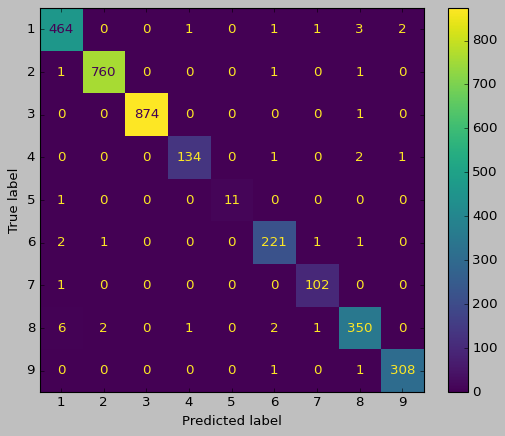

In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred = clf.predict(x_val)
c = confusion_matrix(y_pred, y_val)

plt.figure(figsize = (40, 40), )
plot_confusion_matrix(clf, x_val, y_val, )
plt.show()

c:\users\public\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



<Figure size 120000x120000 with 0 Axes>

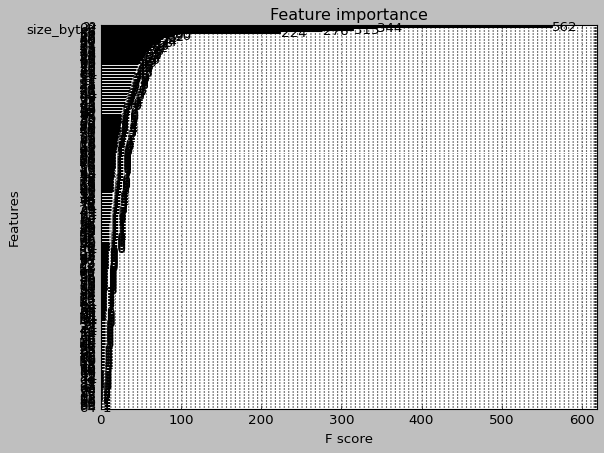

In [126]:
from xgboost import plot_importance 
plt.figure(figsize = (1500, 1500))
plot_importance(clf)
plt.show()

In [53]:
def objective(trial):
    est = [100, 150, 200, 250]
    param = {
        'n_estimators': trial.suggest_categorical('n_estimators', est),
        'num_leaves' : trial.suggest_int('num_leaves', 15, 40),
        'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.8),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
            }
    clf = LGBMClassifier(**param)
    clf.fit(x_train, y_train)
    return log_loss(y_val, clf.predict_proba(x_val.reset_index().drop('index', axis = 1)))

import optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2021-03-14 16:37:30,593] A new study created in memory with name: no-name-00b32f09-6245-4e4d-b019-f824b98fce9f
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7299295416000788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7299295416000788
[LightGBM] [Warning] lambda_l1 is set=0.0008638632269196937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008638632269196937
[LightGBM] [Warning] bagging_fraction is set=0.5092031448525193, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5092031448525193
[LightGBM] [Warning] lambda_l2 is set=0.027972232292597727, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.027972232292597727
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:37:36,368] Trial 0 finished with value: 0.03509025106073323 and parameters: {'n_estimators': 200, 'num_leaves': 23, 'learning_rate': 0.041011450976735704, 'lambda_l1': 0.0008638632269196937, 'lambda_l2': 0.027972232292597727, 'feature_fraction': 0.7299295416000788, 'bagging_fraction': 0.5092031448525193, 'bagging_freq': 1, 'min_child_samples': 62}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.848893771771948, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.848893771771948
[LightGBM] [Warning] lambda_l1 is set=1.2161659772625339e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2161659772625339e-06
[LightGBM] [Warning] bagging_fraction is set=0.7673329777030407, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7673329777030407
[LightGBM] [Warning] lambda_l2 is set=0.011565485390887488, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011565485390887488
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:37:39,562] Trial 1 finished with value: 0.0513295528306255 and parameters: {'n_estimators': 150, 'num_leaves': 34, 'learning_rate': 0.2742425615284681, 'lambda_l1': 1.2161659772625339e-06, 'lambda_l2': 0.011565485390887488, 'feature_fraction': 0.848893771771948, 'bagging_fraction': 0.7673329777030407, 'bagging_freq': 1, 'min_child_samples': 81}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.9006585228219405, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9006585228219405
[LightGBM] [Warning] lambda_l1 is set=0.06009427585594707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06009427585594707
[LightGBM] [Warning] bagging_fraction is set=0.8618009633630164, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8618009633630164
[LightGBM] [Warning] lambda_l2 is set=4.255979466310061e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.255979466310061e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2021-03-14 16:37:47,558] Trial 2 finished with value: 0.06524139662208174 and parameters: {'n_estimators': 200, 'num_leaves': 40, 'learning_rate': 0.014345914023042788, 'lambda_l1': 0.06009427585594707, 'lambda_l2': 4.255979466310061e-06, 'feature_fraction': 0.9006585228219405, 'bagging_fraction': 0.8618009633630164, 'bagging_freq': 7, 'min_child_samples': 77}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7664699472351524, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7664699472351524
[LightGBM] [Warning] lambda_l1 is set=0.0033192725924282595, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0033192725924282595
[LightGBM] [Warning] bagging_fraction is set=0.8287064187293322, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8287064187293322
[LightGBM] [Warning] lambda_l2 is set=0.0015932430090472528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015932430090472528
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:37:52,335] Trial 3 finished with value: 0.05610290258742475 and parameters: {'n_estimators': 150, 'num_leaves': 30, 'learning_rate': 0.09743258960199763, 'lambda_l1': 0.0033192725924282595, 'lambda_l2': 0.0015932430090472528, 'feature_fraction': 0.7664699472351524, 'bagging_fraction': 0.8287064187293322, 'bagging_freq': 1, 'min_child_samples': 10}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.55572353531646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.55572353531646
[LightGBM] [Warning] lambda_l1 is set=0.0016105494480832799, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016105494480832799
[LightGBM] [Warning] bagging_fraction is set=0.9664962396595984, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9664962396595984
[LightGBM] [Warning] lambda_l2 is set=0.0011016554884198215, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011016554884198215
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:37:54,012] Trial 4 finished with value: 0.1995779111050231 and parameters: {'n_estimators': 200, 'num_leaves': 19, 'learning_rate': 0.5847593667328325, 'lambda_l1': 0.0016105494480832799, 'lambda_l2': 0.0011016554884198215, 'feature_fraction': 0.55572353531646, 'bagging_fraction': 0.9664962396595984, 'bagging_freq': 3, 'min_child_samples': 35}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.5668733750750696, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5668733750750696
[LightGBM] [Warning] lambda_l1 is set=0.030026429315771336, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030026429315771336
[LightGBM] [Warning] bagging_fraction is set=0.6980108970036021, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6980108970036021
[LightGBM] [Warning] lambda_l2 is set=1.1590776000231669e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1590776000231669e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:37:56,089] Trial 5 finished with value: 16.088439541204952 and parameters: {'n_estimators': 250, 'num_leaves': 37, 'learning_rate': 0.27946027584375477, 'lambda_l1': 0.030026429315771336, 'lambda_l2': 1.1590776000231669e-06, 'feature_fraction': 0.5668733750750696, 'bagging_fraction': 0.6980108970036021, 'bagging_freq': 1, 'min_child_samples': 77}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7538848157910526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7538848157910526
[LightGBM] [Warning] lambda_l1 is set=0.19392759291903272, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19392759291903272
[LightGBM] [Warning] bagging_fraction is set=0.5167140797740442, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5167140797740442
[LightGBM] [Warning] lambda_l2 is set=1.4141445482510293, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4141445482510293
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2021-03-14 16:37:59,819] Trial 6 finished with value: 0.052130897553659565 and parameters: {'n_estimators': 100, 'num_leaves': 40, 'learning_rate': 0.04189456574029954, 'lambda_l1': 0.19392759291903272, 'lambda_l2': 1.4141445482510293, 'feature_fraction': 0.7538848157910526, 'bagging_fraction': 0.5167140797740442, 'bagging_freq': 7, 'min_child_samples': 6}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.5601332312410685, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5601332312410685
[LightGBM] [Warning] lambda_l1 is set=2.4962418181851076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4962418181851076
[LightGBM] [Warning] bagging_fraction is set=0.4208044439699852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4208044439699852
[LightGBM] [Warning] lambda_l2 is set=0.7585429975970855, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7585429975970855
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2021-03-14 16:38:01,806] Trial 7 finished with value: 0.0570328393073749 and parameters: {'n_estimators': 200, 'num_leaves': 34, 'learning_rate': 0.10064301995572998, 'lambda_l1': 2.4962418181851076, 'lambda_l2': 0.7585429975970855, 'feature_fraction': 0.5601332312410685, 'bagging_fraction': 0.4208044439699852, 'bagging_freq': 7, 'min_child_samples': 20}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.4235599998489211, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4235599998489211
[LightGBM] [Warning] lambda_l1 is set=2.7363786511932943e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7363786511932943e-05
[LightGBM] [Warning] bagging_fraction is set=0.7780252668701102, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7780252668701102
[LightGBM] [Warning] lambda_l2 is set=8.810052241147402e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.810052241147402e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:38:05,742] Trial 8 finished with value: 0.04062589187970941 and parameters: {'n_estimators': 100, 'num_leaves': 32, 'learning_rate': 0.04569694524725595, 'lambda_l1': 2.7363786511932943e-05, 'lambda_l2': 8.810052241147402e-05, 'feature_fraction': 0.4235599998489211, 'bagging_fraction': 0.7780252668701102, 'bagging_freq': 2, 'min_child_samples': 21}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.943987733118548, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.943987733118548
[LightGBM] [Warning] lambda_l1 is set=0.07211349730665534, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07211349730665534
[LightGBM] [Warning] bagging_fraction is set=0.8783017365188788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8783017365188788
[LightGBM] [Warning] lambda_l2 is set=1.1728019743040134e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1728019743040134e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:38:17,518] Trial 9 finished with value: 0.045351405021189214 and parameters: {'n_estimators': 250, 'num_leaves': 22, 'learning_rate': 0.01437753737243418, 'lambda_l1': 0.07211349730665534, 'lambda_l2': 1.1728019743040134e-06, 'feature_fraction': 0.943987733118548, 'bagging_fraction': 0.8783017365188788, 'bagging_freq': 3, 'min_child_samples': 25}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6562228944616332, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6562228944616332
[LightGBM] [Warning] lambda_l1 is set=1.3279958358125772e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3279958358125772e-08
[LightGBM] [Warning] bagging_fraction is set=0.5824410115969033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5824410115969033
[LightGBM] [Warning] lambda_l2 is set=1.892123696580257e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.892123696580257e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2021-03-14 16:38:26,399] Trial 10 finished with value: 0.03893821067760261 and parameters: {'n_estimators': 200, 'num_leaves': 25, 'learning_rate': 0.038727141903272415, 'lambda_l1': 1.3279958358125772e-08, 'lambda_l2': 1.892123696580257e-08, 'feature_fraction': 0.6562228944616332, 'bagging_fraction': 0.5824410115969033, 'bagging_freq': 4, 'min_child_samples': 56}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6639649448901053, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6639649448901053
[LightGBM] [Warning] lambda_l1 is set=1.5391699087759442e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5391699087759442e-08
[LightGBM] [Warning] bagging_fraction is set=0.5896568528718958, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5896568528718958
[LightGBM] [Warning] lambda_l2 is set=2.1005578770635572e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1005578770635572e-08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2021-03-14 16:38:35,448] Trial 11 finished with value: 0.03732190263169533 and parameters: {'n_estimators': 200, 'num_leaves': 25, 'learning_rate': 0.036538762103543516, 'lambda_l1': 1.5391699087759442e-08, 'lambda_l2': 2.1005578770635572e-08, 'feature_fraction': 0.6639649448901053, 'bagging_fraction': 0.5896568528718958, 'bagging_freq': 5, 'min_child_samples': 55}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6774502518185419, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6774502518185419
[LightGBM] [Warning] lambda_l1 is set=2.4543850517755967e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4543850517755967e-05
[LightGBM] [Warning] bagging_fraction is set=0.5852001615029006, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5852001615029006
[LightGBM] [Warning] lambda_l2 is set=0.12953753303327473, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12953753303327473
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2021-03-14 16:38:40,907] Trial 12 finished with value: 0.040028440478681586 and parameters: {'n_estimators': 200, 'num_leaves': 17, 'learning_rate': 0.02567531230590852, 'lambda_l1': 2.4543850517755967e-05, 'lambda_l2': 0.12953753303327473, 'feature_fraction': 0.6774502518185419, 'bagging_fraction': 0.5852001615029006, 'bagging_freq': 5, 'min_child_samples': 52}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8147747321483765, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8147747321483765
[LightGBM] [Warning] lambda_l1 is set=1.1538707390020376e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1538707390020376e-08
[LightGBM] [Warning] bagging_fraction is set=0.4047006617288481, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4047006617288481
[LightGBM] [Warning] lambda_l2 is set=2.9842871286493145e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9842871286493145e-08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2021-03-14 16:38:50,668] Trial 13 finished with value: 0.050661086904378656 and parameters: {'n_estimators': 200, 'num_leaves': 26, 'learning_rate': 0.022733015127911732, 'lambda_l1': 1.1538707390020376e-08, 'lambda_l2': 2.9842871286493145e-08, 'feature_fraction': 0.8147747321483765, 'bagging_fraction': 0.4047006617288481, 'bagging_freq': 5, 'min_child_samples': 100}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6319775509140199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6319775509140199
[LightGBM] [Warning] lambda_l1 is set=4.625006767464543e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.625006767464543e-07
[LightGBM] [Warning] bagging_fraction is set=0.4951914493630017, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4951914493630017
[LightGBM] [Warning] lambda_l2 is set=0.05086074623651449, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05086074623651449
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2021-03-14 16:38:55,216] Trial 14 finished with value: 0.03911060366974718 and parameters: {'n_estimators': 200, 'num_leaves': 22, 'learning_rate': 0.06858911112184311, 'lambda_l1': 4.625006767464543e-07, 'lambda_l2': 0.05086074623651449, 'feature_fraction': 0.6319775509140199, 'bagging_fraction': 0.4951914493630017, 'bagging_freq': 5, 'min_child_samples': 56}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.4422947630967321, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4422947630967321
[LightGBM] [Warning] lambda_l1 is set=0.00024232908823676097, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00024232908823676097
[LightGBM] [Warning] bagging_fraction is set=0.6401256203357852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6401256203357852
[LightGBM] [Warning] lambda_l2 is set=6.330977054043476e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.330977054043476e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2021-03-14 16:39:00,708] Trial 15 finished with value: 0.11347098983835935 and parameters: {'n_estimators': 200, 'num_leaves': 22, 'learning_rate': 0.010137169402180048, 'lambda_l1': 0.00024232908823676097, 'lambda_l2': 6.330977054043476e-05, 'feature_fraction': 0.4422947630967321, 'bagging_fraction': 0.6401256203357852, 'bagging_freq': 6, 'min_child_samples': 47}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7363257009660953, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7363257009660953
[LightGBM] [Warning] lambda_l1 is set=7.156691640283711e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.156691640283711e-07
[LightGBM] [Warning] bagging_fraction is set=0.49362295988749916, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49362295988749916
[LightGBM] [Warning] lambda_l2 is set=0.008906610965214577, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008906610965214577
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2021-03-14 16:39:04,503] Trial 16 finished with value: 0.05217957323990824 and parameters: {'n_estimators': 200, 'num_leaves': 28, 'learning_rate': 0.15866391992200618, 'lambda_l1': 7.156691640283711e-07, 'lambda_l2': 0.008906610965214577, 'feature_fraction': 0.7363257009660953, 'bagging_fraction': 0.49362295988749916, 'bagging_freq': 4, 'min_child_samples': 64}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6057649720553172, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6057649720553172
[LightGBM] [Warning] lambda_l1 is set=2.4185359921326087e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4185359921326087e-05
[LightGBM] [Warning] bagging_fraction is set=0.5845737639665763, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5845737639665763
[LightGBM] [Warning] lambda_l2 is set=2.695984428818091, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.695984428818091
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2021-03-14 16:39:07,488] Trial 17 finished with value: 0.07520864901311868 and parameters: {'n_estimators': 150, 'num_leaves': 15, 'learning_rate': 0.02533776433687323, 'lambda_l1': 2.4185359921326087e-05, 'lambda_l2': 2.695984428818091, 'feature_fraction': 0.6057649720553172, 'bagging_fraction': 0.5845737639665763, 'bagging_freq': 6, 'min_child_samples': 93}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.49326763818273833, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49326763818273833
[LightGBM] [Warning] lambda_l1 is set=5.164308525389664, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.164308525389664
[LightGBM] [Warning] bagging_fraction is set=0.45232004878391885, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45232004878391885
[LightGBM] [Warning] lambda_l2 is set=8.422727126544881, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.422727126544881
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:39:09,813] Trial 18 finished with value: 0.08712697875924096 and parameters: {'n_estimators': 250, 'num_leaves': 20, 'learning_rate': 0.05988276423807472, 'lambda_l1': 5.164308525389664, 'lambda_l2': 8.422727126544881, 'feature_fraction': 0.49326763818273833, 'bagging_fraction': 0.45232004878391885, 'bagging_freq': 3, 'min_child_samples': 68}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7190746258276073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7190746258276073
[LightGBM] [Warning] lambda_l1 is set=8.599113386009832e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.599113386009832e-08
[LightGBM] [Warning] bagging_fraction is set=0.6615705411959715, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6615705411959715
[LightGBM] [Warning] lambda_l2 is set=1.3295207167087318e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3295207167087318e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:39:13,802] Trial 19 finished with value: 0.04764518108911397 and parameters: {'n_estimators': 100, 'num_leaves': 25, 'learning_rate': 0.13762182740300635, 'lambda_l1': 8.599113386009832e-08, 'lambda_l2': 1.3295207167087318e-07, 'feature_fraction': 0.7190746258276073, 'bagging_fraction': 0.6615705411959715, 'bagging_freq': 2, 'min_child_samples': 40}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.9903467026927094, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9903467026927094
[LightGBM] [Warning] lambda_l1 is set=0.0003391853605182461, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003391853605182461
[LightGBM] [Warning] bagging_fraction is set=0.5357649124933168, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5357649124933168
[LightGBM] [Warning] lambda_l2 is set=1.8417023185070234e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8417023185070234e-05
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2021-03-14 16:39:23,521] Trial 20 finished with value: 0.03918097144094945 and parameters: {'n_estimators': 200, 'num_leaves': 28, 'learning_rate': 0.031132802410833955, 'lambda_l1': 0.0003391853605182461, 'lambda_l2': 1.8417023185070234e-05, 'feature_fraction': 0.9903467026927094, 'bagging_fraction': 0.5357649124933168, 'bagging_freq': 6, 'min_child_samples': 65}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6640566715988485, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6640566715988485
[LightGBM] [Warning] lambda_l1 is set=1.3959733252871778e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3959733252871778e-08
[LightGBM] [Warning] bagging_fraction is set=0.5845160443578072, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5845160443578072
[LightGBM] [Warning] lambda_l2 is set=4.233002346416174e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.233002346416174e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2021-03-14 16:39:32,626] Trial 21 finished with value: 0.03728064149566807 and parameters: {'n_estimators': 200, 'num_leaves': 25, 'learning_rate': 0.03747855494728684, 'lambda_l1': 1.3959733252871778e-08, 'lambda_l2': 4.233002346416174e-08, 'feature_fraction': 0.6640566715988485, 'bagging_fraction': 0.5845160443578072, 'bagging_freq': 4, 'min_child_samples': 55}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8094821857359684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8094821857359684
[LightGBM] [Warning] lambda_l1 is set=6.099035283517245e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.099035283517245e-08
[LightGBM] [Warning] bagging_fraction is set=0.6298700784870186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6298700784870186
[LightGBM] [Warning] lambda_l2 is set=9.936985322650007e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.936985322650007e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2021-03-14 16:39:43,910] Trial 22 finished with value: 0.04716197258936296 and parameters: {'n_estimators': 200, 'num_leaves': 24, 'learning_rate': 0.017927470798571425, 'lambda_l1': 6.099035283517245e-08, 'lambda_l2': 9.936985322650007e-08, 'feature_fraction': 0.8094821857359684, 'bagging_fraction': 0.6298700784870186, 'bagging_freq': 4, 'min_child_samples': 43}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6773197183525586, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6773197183525586
[LightGBM] [Warning] lambda_l1 is set=3.1683480637742146e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1683480637742146e-06
[LightGBM] [Warning] bagging_fraction is set=0.5567353228866893, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5567353228866893
[LightGBM] [Warning] lambda_l2 is set=1.9953470626328964e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9953470626328964e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2021-03-14 16:39:52,824] Trial 23 finished with value: 0.04653380582387585 and parameters: {'n_estimators': 200, 'num_leaves': 29, 'learning_rate': 0.05678407325774431, 'lambda_l1': 3.1683480637742146e-06, 'lambda_l2': 1.9953470626328964e-07, 'feature_fraction': 0.6773197183525586, 'bagging_fraction': 0.5567353228866893, 'bagging_freq': 5, 'min_child_samples': 33}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6219082268567097, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6219082268567097
[LightGBM] [Warning] lambda_l1 is set=9.77441256283416e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.77441256283416e-08
[LightGBM] [Warning] bagging_fraction is set=0.46215806786942215, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46215806786942215
[LightGBM] [Warning] lambda_l2 is set=1.4772679327627457e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4772679327627457e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:40:00,938] Trial 24 finished with value: 0.03827533512802098 and parameters: {'n_estimators': 200, 'num_leaves': 23, 'learning_rate': 0.03435740452534357, 'lambda_l1': 9.77441256283416e-08, 'lambda_l2': 1.4772679327627457e-08, 'feature_fraction': 0.6219082268567097, 'bagging_fraction': 0.46215806786942215, 'bagging_freq': 2, 'min_child_samples': 60}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.4971680886340146, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4971680886340146
[LightGBM] [Warning] lambda_l1 is set=0.004397251256774516, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004397251256774516
[LightGBM] [Warning] bagging_fraction is set=0.6242398520419434, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6242398520419434
[LightGBM] [Warning] lambda_l2 is set=0.17524367519493497, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17524367519493497
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2021-03-14 16:40:05,594] Trial 25 finished with value: 0.12010985144785552 and parameters: {'n_estimators': 200, 'num_leaves': 20, 'learning_rate': 0.010102073972066763, 'lambda_l1': 0.004397251256774516, 'lambda_l2': 0.17524367519493497, 'feature_fraction': 0.4971680886340146, 'bagging_fraction': 0.6242398520419434, 'bagging_freq': 4, 'min_child_samples': 50}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6954170780190805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6954170780190805
[LightGBM] [Warning] lambda_l1 is set=0.0003040194689167156, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003040194689167156
[LightGBM] [Warning] bagging_fraction is set=0.7022806795930078, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7022806795930078
[LightGBM] [Warning] lambda_l2 is set=0.0006740345635475687, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006740345635475687
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:40:11,769] Trial 26 finished with value: 0.04701263616763454 and parameters: {'n_estimators': 200, 'num_leaves': 26, 'learning_rate': 0.07334052956889742, 'lambda_l1': 0.0003040194689167156, 'lambda_l2': 0.0006740345635475687, 'feature_fraction': 0.6954170780190805, 'bagging_fraction': 0.7022806795930078, 'bagging_freq': 3, 'min_child_samples': 72}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7886059283085967, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7886059283085967
[LightGBM] [Warning] lambda_l1 is set=5.540961342656534e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.540961342656534e-06
[LightGBM] [Warning] bagging_fraction is set=0.6943986324920053, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6943986324920053
[LightGBM] [Warning] lambda_l2 is set=8.53711074016229e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.53711074016229e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2021-03-14 16:40:20,056] Trial 27 finished with value: 0.047341640352765516 and parameters: {'n_estimators': 200, 'num_leaves': 18, 'learning_rate': 0.018128423292651675, 'lambda_l1': 5.540961342656534e-06, 'lambda_l2': 8.53711074016229e-07, 'feature_fraction': 0.7886059283085967, 'bagging_fraction': 0.6943986324920053, 'bagging_freq': 5, 'min_child_samples': 60}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.5998099139040243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5998099139040243
[LightGBM] [Warning] lambda_l1 is set=1.901056423967549e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.901056423967549e-08
[LightGBM] [Warning] bagging_fraction is set=0.5465486717226066, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5465486717226066
[LightGBM] [Warning] lambda_l2 is set=0.008459174817439678, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008459174817439678
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2021-03-14 16:40:22,938] Trial 28 finished with value: 0.04255814834249287 and parameters: {'n_estimators': 100, 'num_leaves': 31, 'learning_rate': 0.049424055515873165, 'lambda_l1': 1.901056423967549e-08, 'lambda_l2': 0.008459174817439678, 'feature_fraction': 0.5998099139040243, 'bagging_fraction': 0.5465486717226066, 'bagging_freq': 6, 'min_child_samples': 86}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8676688034213402, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8676688034213402
[LightGBM] [Warning] lambda_l1 is set=2.2914284271495302e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2914284271495302e-07
[LightGBM] [Warning] bagging_fraction is set=0.7552017713778267, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7552017713778267
[LightGBM] [Warning] lambda_l2 is set=0.03837138565932915, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03837138565932915
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2021-03-14 16:40:27,592] Trial 29 finished with value: 0.040589385536845685 and parameters: {'n_estimators': 150, 'num_leaves': 27, 'learning_rate': 0.1401623997966459, 'lambda_l1': 2.2914284271495302e-07, 'lambda_l2': 0.03837138565932915, 'feature_fraction': 0.8676688034213402, 'bagging_fraction': 0.7552017713778267, 'bagging_freq': 4, 'min_child_samples': 72}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7179087240044073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7179087240044073
[LightGBM] [Warning] lambda_l1 is set=2.9573394549166576e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9573394549166576e-06
[LightGBM] [Warning] bagging_fraction is set=0.6005584791574026, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6005584791574026
[LightGBM] [Warning] lambda_l2 is set=1.0171013790488512e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0171013790488512e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:40:35,515] Trial 30 finished with value: 0.037517304999797774 and parameters: {'n_estimators': 250, 'num_leaves': 15, 'learning_rate': 0.02883085759539813, 'lambda_l1': 2.9573394549166576e-06, 'lambda_l2': 1.0171013790488512e-08, 'feature_fraction': 0.7179087240044073, 'bagging_fraction': 0.6005584791574026, 'bagging_freq': 3, 'min_child_samples': 86}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7170716264060233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7170716264060233
[LightGBM] [Warning] lambda_l1 is set=1.2569753889229833e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2569753889229833e-06
[LightGBM] [Warning] bagging_fraction is set=0.6137756578112479, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6137756578112479
[LightGBM] [Warning] lambda_l2 is set=1.158639388318597e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.158639388318597e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:40:43,584] Trial 31 finished with value: 0.036804085879082384 and parameters: {'n_estimators': 250, 'num_leaves': 15, 'learning_rate': 0.02860196636829734, 'lambda_l1': 1.2569753889229833e-06, 'lambda_l2': 1.158639388318597e-08, 'feature_fraction': 0.7170716264060233, 'bagging_fraction': 0.6137756578112479, 'bagging_freq': 2, 'min_child_samples': 85}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6521687856363777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6521687856363777
[LightGBM] [Warning] lambda_l1 is set=3.778570860712019e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.778570860712019e-08
[LightGBM] [Warning] bagging_fraction is set=0.666094530038482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.666094530038482
[LightGBM] [Warning] lambda_l2 is set=4.632253735862607e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.632253735862607e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:40:54,677] Trial 32 finished with value: 0.039611295819902304 and parameters: {'n_estimators': 250, 'num_leaves': 24, 'learning_rate': 0.019456156402987448, 'lambda_l1': 3.778570860712019e-08, 'lambda_l2': 4.632253735862607e-08, 'feature_fraction': 0.6521687856363777, 'bagging_fraction': 0.666094530038482, 'bagging_freq': 1, 'min_child_samples': 98}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7682536404199846, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7682536404199846
[LightGBM] [Warning] lambda_l1 is set=0.0008474946745456892, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008474946745456892
[LightGBM] [Warning] bagging_fraction is set=0.46285235909094957, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46285235909094957
[LightGBM] [Warning] lambda_l2 is set=3.4016842518209595e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4016842518209595e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:41:01,839] Trial 33 finished with value: 0.036371867617590016 and parameters: {'n_estimators': 250, 'num_leaves': 17, 'learning_rate': 0.03873504820490584, 'lambda_l1': 0.0008474946745456892, 'lambda_l2': 3.4016842518209595e-07, 'feature_fraction': 0.7682536404199846, 'bagging_fraction': 0.46285235909094957, 'bagging_freq': 2, 'min_child_samples': 81}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8519270113406453, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8519270113406453
[LightGBM] [Warning] lambda_l1 is set=0.0008405743003815785, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008405743003815785
[LightGBM] [Warning] bagging_fraction is set=0.45418329626727905, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45418329626727905
[LightGBM] [Warning] lambda_l2 is set=7.464055901596564e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.464055901596564e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:41:09,463] Trial 34 finished with value: 0.06595660504797098 and parameters: {'n_estimators': 250, 'num_leaves': 16, 'learning_rate': 0.013499186839784573, 'lambda_l1': 0.0008405743003815785, 'lambda_l2': 7.464055901596564e-06, 'feature_fraction': 0.8519270113406453, 'bagging_fraction': 0.45418329626727905, 'bagging_freq': 2, 'min_child_samples': 85}. Best is trial 0 with value: 0.03509025106073323.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7630017225775518, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7630017225775518
[LightGBM] [Warning] lambda_l1 is set=0.02205004309870067, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02205004309870067
[LightGBM] [Warning] bagging_fraction is set=0.4946485474894492, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4946485474894492
[LightGBM] [Warning] lambda_l2 is set=3.9415486524332264e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9415486524332264e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:41:13,874] Trial 35 finished with value: 0.034928779148588475 and parameters: {'n_estimators': 250, 'num_leaves': 20, 'learning_rate': 0.0882124789184781, 'lambda_l1': 0.02205004309870067, 'lambda_l2': 3.9415486524332264e-07, 'feature_fraction': 0.7630017225775518, 'bagging_fraction': 0.4946485474894492, 'bagging_freq': 1, 'min_child_samples': 78}. Best is trial 35 with value: 0.034928779148588475.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.763970565311174, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.763970565311174
[LightGBM] [Warning] lambda_l1 is set=0.007069100155903003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007069100155903003
[LightGBM] [Warning] bagging_fraction is set=0.4305700563092225, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4305700563092225
[LightGBM] [Warning] lambda_l2 is set=3.2916521284618456e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2916521284618456e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:41:18,494] Trial 36 finished with value: 0.04049791450413462 and parameters: {'n_estimators': 250, 'num_leaves': 19, 'learning_rate': 0.08560812713823092, 'lambda_l1': 0.007069100155903003, 'lambda_l2': 3.2916521284618456e-07, 'feature_fraction': 0.763970565311174, 'bagging_fraction': 0.4305700563092225, 'bagging_freq': 1, 'min_child_samples': 94}. Best is trial 35 with value: 0.034928779148588475.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7895395084766965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7895395084766965
[LightGBM] [Warning] lambda_l1 is set=0.5585821749018366, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5585821749018366
[LightGBM] [Warning] bagging_fraction is set=0.5101156906685672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5101156906685672
[LightGBM] [Warning] lambda_l2 is set=2.6581587146177193e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6581587146177193e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:41:20,934] Trial 37 finished with value: 0.03769597986131783 and parameters: {'n_estimators': 250, 'num_leaves': 20, 'learning_rate': 0.1995678652486897, 'lambda_l1': 0.5585821749018366, 'lambda_l2': 2.6581587146177193e-06, 'feature_fraction': 0.7895395084766965, 'bagging_fraction': 0.5101156906685672, 'bagging_freq': 1, 'min_child_samples': 78}. Best is trial 35 with value: 0.034928779148588475.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8284178344208964, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8284178344208964
[LightGBM] [Warning] lambda_l1 is set=0.02048092315411964, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02048092315411964
[LightGBM] [Warning] bagging_fraction is set=0.48041815031270096, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48041815031270096
[LightGBM] [Warning] lambda_l2 is set=0.000116870894271286, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000116870894271286
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:41:22,828] Trial 38 finished with value: 11.930984111826467 and parameters: {'n_estimators': 250, 'num_leaves': 18, 'learning_rate': 0.4415982850582735, 'lambda_l1': 0.02048092315411964, 'lambda_l2': 0.000116870894271286, 'feature_fraction': 0.8284178344208964, 'bagging_fraction': 0.48041815031270096, 'bagging_freq': 2, 'min_child_samples': 72}. Best is trial 35 with value: 0.034928779148588475.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8886007735740418, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8886007735740418
[LightGBM] [Warning] lambda_l1 is set=0.00010160850340217974, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010160850340217974
[LightGBM] [Warning] bagging_fraction is set=0.40445102792571686, subsample=1.0 will be ignored. Current value: bagging_fraction=0.40445102792571686
[LightGBM] [Warning] lambda_l2 is set=0.0028824107567043847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0028824107567043847
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:41:28,592] Trial 39 finished with value: 0.04428007626076743 and parameters: {'n_estimators': 250, 'num_leaves': 16, 'learning_rate': 0.09233248023481963, 'lambda_l1': 0.00010160850340217974, 'lambda_l2': 0.0028824107567043847, 'feature_fraction': 0.8886007735740418, 'bagging_fraction': 0.40445102792571686, 'bagging_freq': 1, 'min_child_samples': 78}. Best is trial 35 with value: 0.034928779148588475.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.747886678201931, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.747886678201931
[LightGBM] [Warning] lambda_l1 is set=0.001445901603439679, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001445901603439679
[LightGBM] [Warning] bagging_fraction is set=0.5356002567977259, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5356002567977259
[LightGBM] [Warning] lambda_l2 is set=5.300765529424276e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.300765529424276e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:41:35,641] Trial 40 finished with value: 0.03733980488376214 and parameters: {'n_estimators': 250, 'num_leaves': 17, 'learning_rate': 0.04676604468268182, 'lambda_l1': 0.001445901603439679, 'lambda_l2': 5.300765529424276e-07, 'feature_fraction': 0.747886678201931, 'bagging_fraction': 0.5356002567977259, 'bagging_freq': 2, 'min_child_samples': 92}. Best is trial 35 with value: 0.034928779148588475.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7059702558204511, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7059702558204511
[LightGBM] [Warning] lambda_l1 is set=0.010286058987857111, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010286058987857111
[LightGBM] [Warning] bagging_fraction is set=0.5583755803520503, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5583755803520503
[LightGBM] [Warning] lambda_l2 is set=5.4591513985508246e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.4591513985508246e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:41:39,633] Trial 41 finished with value: 0.040221551101184055 and parameters: {'n_estimators': 250, 'num_leaves': 21, 'learning_rate': 0.11415576528187278, 'lambda_l1': 0.010286058987857111, 'lambda_l2': 5.4591513985508246e-08, 'feature_fraction': 0.7059702558204511, 'bagging_fraction': 0.5583755803520503, 'bagging_freq': 1, 'min_child_samples': 88}. Best is trial 35 with value: 0.034928779148588475.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7861089451850033, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7861089451850033
[LightGBM] [Warning] lambda_l1 is set=0.12354432152978755, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12354432152978755
[LightGBM] [Warning] bagging_fraction is set=0.5094238314799027, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5094238314799027
[LightGBM] [Warning] lambda_l2 is set=2.5141731288430137e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5141731288430137e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:41:44,575] Trial 42 finished with value: 0.033465138692138824 and parameters: {'n_estimators': 250, 'num_leaves': 23, 'learning_rate': 0.054224641960325226, 'lambda_l1': 0.12354432152978755, 'lambda_l2': 2.5141731288430137e-06, 'feature_fraction': 0.7861089451850033, 'bagging_fraction': 0.5094238314799027, 'bagging_freq': 2, 'min_child_samples': 82}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7789892144116919, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7789892144116919
[LightGBM] [Warning] lambda_l1 is set=0.15776128745768112, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15776128745768112
[LightGBM] [Warning] bagging_fraction is set=0.43058136947228154, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43058136947228154
[LightGBM] [Warning] lambda_l2 is set=3.685190695072405e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.685190695072405e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:41:48,992] Trial 43 finished with value: 0.034252964920073715 and parameters: {'n_estimators': 250, 'num_leaves': 18, 'learning_rate': 0.05653275526980248, 'lambda_l1': 0.15776128745768112, 'lambda_l2': 3.685190695072405e-06, 'feature_fraction': 0.7789892144116919, 'bagging_fraction': 0.43058136947228154, 'bagging_freq': 2, 'min_child_samples': 81}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7817133260465312, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7817133260465312
[LightGBM] [Warning] lambda_l1 is set=0.3193813459058877, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3193813459058877
[LightGBM] [Warning] bagging_fraction is set=0.44367699443621217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.44367699443621217
[LightGBM] [Warning] lambda_l2 is set=3.400053717405751e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.400053717405751e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:41:53,110] Trial 44 finished with value: 0.03625405037747596 and parameters: {'n_estimators': 250, 'num_leaves': 19, 'learning_rate': 0.07476216528886001, 'lambda_l1': 0.3193813459058877, 'lambda_l2': 3.400053717405751e-06, 'feature_fraction': 0.7817133260465312, 'bagging_fraction': 0.44367699443621217, 'bagging_freq': 1, 'min_child_samples': 83}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.9224188134360447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9224188134360447
[LightGBM] [Warning] lambda_l1 is set=0.3741830123410273, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3741830123410273
[LightGBM] [Warning] bagging_fraction is set=0.42629015664537934, subsample=1.0 will be ignored. Current value: bagging_fraction=0.42629015664537934
[LightGBM] [Warning] lambda_l2 is set=9.702378124105516e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702378124105516e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:41:57,773] Trial 45 finished with value: 0.03714987061264855 and parameters: {'n_estimators': 250, 'num_leaves': 21, 'learning_rate': 0.07452864117113052, 'lambda_l1': 0.3741830123410273, 'lambda_l2': 9.702378124105516e-06, 'feature_fraction': 0.9224188134360447, 'bagging_fraction': 0.42629015664537934, 'bagging_freq': 1, 'min_child_samples': 74}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8395471220250853, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8395471220250853
[LightGBM] [Warning] lambda_l1 is set=0.11300714185396896, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11300714185396896
[LightGBM] [Warning] bagging_fraction is set=0.5157270732985246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5157270732985246
[LightGBM] [Warning] lambda_l2 is set=2.3197695818281927e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3197695818281927e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:42:03,003] Trial 46 finished with value: 0.03594671350130215 and parameters: {'n_estimators': 250, 'num_leaves': 19, 'learning_rate': 0.05837210565650542, 'lambda_l1': 0.11300714185396896, 'lambda_l2': 2.3197695818281927e-06, 'feature_fraction': 0.8395471220250853, 'bagging_fraction': 0.5157270732985246, 'bagging_freq': 1, 'min_child_samples': 80}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8322693791953705, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8322693791953705
[LightGBM] [Warning] lambda_l1 is set=0.08585075956215758, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08585075956215758
[LightGBM] [Warning] bagging_fraction is set=0.5138598934849002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5138598934849002
[LightGBM] [Warning] lambda_l2 is set=2.456601153940857e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.456601153940857e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:42:08,385] Trial 47 finished with value: 0.035806466795861996 and parameters: {'n_estimators': 250, 'num_leaves': 23, 'learning_rate': 0.05640455571602175, 'lambda_l1': 0.08585075956215758, 'lambda_l2': 2.456601153940857e-05, 'feature_fraction': 0.8322693791953705, 'bagging_fraction': 0.5138598934849002, 'bagging_freq': 1, 'min_child_samples': 67}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8767664492934462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767664492934462
[LightGBM] [Warning] lambda_l1 is set=1.2730619445673934, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2730619445673934
[LightGBM] [Warning] bagging_fraction is set=0.4005746921856517, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4005746921856517
[LightGBM] [Warning] lambda_l2 is set=4.276639556973923e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.276639556973923e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:42:10,578] Trial 48 finished with value: 0.04470042008746489 and parameters: {'n_estimators': 150, 'num_leaves': 23, 'learning_rate': 0.10760097343113313, 'lambda_l1': 1.2730619445673934, 'lambda_l2': 4.276639556973923e-05, 'feature_fraction': 0.8767664492934462, 'bagging_fraction': 0.4005746921856517, 'bagging_freq': 2, 'min_child_samples': 66}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8050049992677453, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8050049992677453
[LightGBM] [Warning] lambda_l1 is set=0.043822187856929866, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.043822187856929866
[LightGBM] [Warning] bagging_fraction is set=0.9883400259723372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9883400259723372
[LightGBM] [Warning] lambda_l2 is set=0.00020258367224119296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00020258367224119296
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:42:17,555] Trial 49 finished with value: 0.038141836627387876 and parameters: {'n_estimators': 250, 'num_leaves': 23, 'learning_rate': 0.050433374991099206, 'lambda_l1': 0.043822187856929866, 'lambda_l2': 0.00020258367224119296, 'feature_fraction': 0.8050049992677453, 'bagging_fraction': 0.9883400259723372, 'bagging_freq': 1, 'min_child_samples': 69}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.9050858598357066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9050858598357066
[LightGBM] [Warning] lambda_l1 is set=0.021073428058064548, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.021073428058064548
[LightGBM] [Warning] bagging_fraction is set=0.4783838947126444, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4783838947126444
[LightGBM] [Warning] lambda_l2 is set=2.8246887612711772e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8246887612711772e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:42:20,637] Trial 50 finished with value: 0.039742326832817844 and parameters: {'n_estimators': 250, 'num_leaves': 21, 'learning_rate': 0.2130840860536588, 'lambda_l1': 0.021073428058064548, 'lambda_l2': 2.8246887612711772e-05, 'feature_fraction': 0.9050858598357066, 'bagging_fraction': 0.4783838947126444, 'bagging_freq': 2, 'min_child_samples': 75}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8256265636218724, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8256265636218724
[LightGBM] [Warning] lambda_l1 is set=0.12251228090581895, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12251228090581895
[LightGBM] [Warning] bagging_fraction is set=0.5088324159930185, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5088324159930185
[LightGBM] [Warning] lambda_l2 is set=2.537267107954437e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.537267107954437e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:42:25,405] Trial 51 finished with value: 0.03533419935715505 and parameters: {'n_estimators': 250, 'num_leaves': 18, 'learning_rate': 0.06110395662059688, 'lambda_l1': 0.12251228090581895, 'lambda_l2': 2.537267107954437e-06, 'feature_fraction': 0.8256265636218724, 'bagging_fraction': 0.5088324159930185, 'bagging_freq': 1, 'min_child_samples': 80}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7476931879071319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7476931879071319
[LightGBM] [Warning] lambda_l1 is set=0.09708364623977356, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09708364623977356
[LightGBM] [Warning] bagging_fraction is set=0.5012219893066008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5012219893066008
[LightGBM] [Warning] lambda_l2 is set=1.2276283818677152e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2276283818677152e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:42:29,920] Trial 52 finished with value: 0.03438903949902902 and parameters: {'n_estimators': 250, 'num_leaves': 22, 'learning_rate': 0.0619850404513376, 'lambda_l1': 0.09708364623977356, 'lambda_l2': 1.2276283818677152e-05, 'feature_fraction': 0.7476931879071319, 'bagging_fraction': 0.5012219893066008, 'bagging_freq': 1, 'min_child_samples': 90}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7429789228151116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7429789228151116
[LightGBM] [Warning] lambda_l1 is set=1.502061052683986, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.502061052683986
[LightGBM] [Warning] bagging_fraction is set=0.483789154146074, subsample=1.0 will be ignored. Current value: bagging_fraction=0.483789154146074
[LightGBM] [Warning] lambda_l2 is set=1.429766874512248e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.429766874512248e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:42:33,090] Trial 53 finished with value: 0.044754981763066984 and parameters: {'n_estimators': 250, 'num_leaves': 21, 'learning_rate': 0.06526876524179186, 'lambda_l1': 1.502061052683986, 'lambda_l2': 1.429766874512248e-06, 'feature_fraction': 0.7429789228151116, 'bagging_fraction': 0.483789154146074, 'bagging_freq': 1, 'min_child_samples': 89}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7352992226295036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7352992226295036
[LightGBM] [Warning] lambda_l1 is set=0.202022543029191, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.202022543029191
[LightGBM] [Warning] bagging_fraction is set=0.5610366703621497, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5610366703621497
[LightGBM] [Warning] lambda_l2 is set=1.0660224818408979e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0660224818408979e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:42:36,722] Trial 54 finished with value: 0.039592682948693794 and parameters: {'n_estimators': 250, 'num_leaves': 18, 'learning_rate': 0.08734420411243056, 'lambda_l1': 0.202022543029191, 'lambda_l2': 1.0660224818408979e-05, 'feature_fraction': 0.7352992226295036, 'bagging_fraction': 0.5610366703621497, 'bagging_freq': 2, 'min_child_samples': 99}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7718363433564076, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7718363433564076
[LightGBM] [Warning] lambda_l1 is set=8.97322054976959, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.97322054976959
[LightGBM] [Warning] bagging_fraction is set=0.49612921215074074, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49612921215074074
[LightGBM] [Warning] lambda_l2 is set=5.618267210831596e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.618267210831596e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:42:38,213] Trial 55 finished with value: 0.1320689851630937 and parameters: {'n_estimators': 100, 'num_leaves': 22, 'learning_rate': 0.04343921059091019, 'lambda_l1': 8.97322054976959, 'lambda_l2': 5.618267210831596e-06, 'feature_fraction': 0.7718363433564076, 'bagging_fraction': 0.49612921215074074, 'bagging_freq': 1, 'min_child_samples': 95}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6864398998952235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6864398998952235
[LightGBM] [Warning] lambda_l1 is set=0.6671548897051787, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6671548897051787
[LightGBM] [Warning] bagging_fraction is set=0.9260076341049568, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9260076341049568
[LightGBM] [Warning] lambda_l2 is set=1.0158042143661363e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0158042143661363e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:42:41,425] Trial 56 finished with value: 0.04060381114668223 and parameters: {'n_estimators': 250, 'num_leaves': 20, 'learning_rate': 0.11530731978590479, 'lambda_l1': 0.6671548897051787, 'lambda_l2': 1.0158042143661363e-06, 'feature_fraction': 0.6864398998952235, 'bagging_fraction': 0.9260076341049568, 'bagging_freq': 3, 'min_child_samples': 91}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.809345466783996, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.809345466783996
[LightGBM] [Warning] lambda_l1 is set=0.14263064507034925, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14263064507034925
[LightGBM] [Warning] bagging_fraction is set=0.5308829214330859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5308829214330859
[LightGBM] [Warning] lambda_l2 is set=0.0005096700333272389, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005096700333272389
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:42:45,488] Trial 57 finished with value: 0.038196396079350256 and parameters: {'n_estimators': 250, 'num_leaves': 24, 'learning_rate': 0.08346985769168912, 'lambda_l1': 0.14263064507034925, 'lambda_l2': 0.0005096700333272389, 'feature_fraction': 0.809345466783996, 'bagging_fraction': 0.5308829214330859, 'bagging_freq': 2, 'min_child_samples': 81}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.751561946011765, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.751561946011765
[LightGBM] [Warning] lambda_l1 is set=0.011788567169024593, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011788567169024593
[LightGBM] [Warning] bagging_fraction is set=0.4206132731776534, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4206132731776534
[LightGBM] [Warning] lambda_l2 is set=4.568106462728576e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.568106462728576e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:42:49,548] Trial 58 finished with value: 0.03764328618935141 and parameters: {'n_estimators': 150, 'num_leaves': 37, 'learning_rate': 0.06621144492899755, 'lambda_l1': 0.011788567169024593, 'lambda_l2': 4.568106462728576e-06, 'feature_fraction': 0.751561946011765, 'bagging_fraction': 0.4206132731776534, 'bagging_freq': 1, 'min_child_samples': 61}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7939336696285657, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7939336696285657
[LightGBM] [Warning] lambda_l1 is set=0.04289110982695912, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04289110982695912
[LightGBM] [Warning] bagging_fraction is set=0.5717569137454762, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5717569137454762
[LightGBM] [Warning] lambda_l2 is set=1.5232943501477388e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5232943501477388e-05
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:42:55,403] Trial 59 finished with value: 0.03637936995942652 and parameters: {'n_estimators': 250, 'num_leaves': 17, 'learning_rate': 0.05161129271367047, 'lambda_l1': 0.04289110982695912, 'lambda_l2': 1.5232943501477388e-05, 'feature_fraction': 0.7939336696285657, 'bagging_fraction': 0.5717569137454762, 'bagging_freq': 3, 'min_child_samples': 76}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8461941683190475, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8461941683190475
[LightGBM] [Warning] lambda_l1 is set=2.043621310239187, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.043621310239187
[LightGBM] [Warning] bagging_fraction is set=0.5006192658265529, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5006192658265529
[LightGBM] [Warning] lambda_l2 is set=5.890651362563567e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.890651362563567e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:42:59,550] Trial 60 finished with value: 0.05644040370275751 and parameters: {'n_estimators': 250, 'num_leaves': 22, 'learning_rate': 0.03403373674938065, 'lambda_l1': 2.043621310239187, 'lambda_l2': 5.890651362563567e-07, 'feature_fraction': 0.8461941683190475, 'bagging_fraction': 0.5006192658265529, 'bagging_freq': 1, 'min_child_samples': 97}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8257428794938898, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8257428794938898
[LightGBM] [Warning] lambda_l1 is set=0.09609318533889477, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09609318533889477
[LightGBM] [Warning] bagging_fraction is set=0.5320434322987357, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5320434322987357
[LightGBM] [Warning] lambda_l2 is set=2.8855314634054952e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8855314634054952e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:43:04,905] Trial 61 finished with value: 0.033671860348095384 and parameters: {'n_estimators': 250, 'num_leaves': 23, 'learning_rate': 0.0574813768977683, 'lambda_l1': 0.09609318533889477, 'lambda_l2': 2.8855314634054952e-05, 'feature_fraction': 0.8257428794938898, 'bagging_fraction': 0.5320434322987357, 'bagging_freq': 1, 'min_child_samples': 62}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8209029793023814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8209029793023814
[LightGBM] [Warning] lambda_l1 is set=0.07982749610929625, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07982749610929625
[LightGBM] [Warning] bagging_fraction is set=0.47192679287216116, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47192679287216116
[LightGBM] [Warning] lambda_l2 is set=7.595326444514167e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.595326444514167e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:43:10,630] Trial 62 finished with value: 0.03617349386709426 and parameters: {'n_estimators': 250, 'num_leaves': 19, 'learning_rate': 0.04478398940237181, 'lambda_l1': 0.07982749610929625, 'lambda_l2': 7.595326444514167e-05, 'feature_fraction': 0.8209029793023814, 'bagging_fraction': 0.47192679287216116, 'bagging_freq': 1, 'min_child_samples': 69}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7283672329070512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7283672329070512
[LightGBM] [Warning] lambda_l1 is set=0.0031775592147464293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0031775592147464293
[LightGBM] [Warning] bagging_fraction is set=0.5261144330731266, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5261144330731266
[LightGBM] [Warning] lambda_l2 is set=2.8527578583100706e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8527578583100706e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:43:17,185] Trial 63 finished with value: 0.038638013217460555 and parameters: {'n_estimators': 250, 'num_leaves': 26, 'learning_rate': 0.061541727915869385, 'lambda_l1': 0.0031775592147464293, 'lambda_l2': 2.8527578583100706e-06, 'feature_fraction': 0.7283672329070512, 'bagging_fraction': 0.5261144330731266, 'bagging_freq': 2, 'min_child_samples': 61}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.863084063509338, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.863084063509338
[LightGBM] [Warning] lambda_l1 is set=0.2120000422916309, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2120000422916309
[LightGBM] [Warning] bagging_fraction is set=0.43893096514197194, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43893096514197194
[LightGBM] [Warning] lambda_l2 is set=1.6784565281860406e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6784565281860406e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:43:22,392] Trial 64 finished with value: 0.03744967968117281 and parameters: {'n_estimators': 250, 'num_leaves': 24, 'learning_rate': 0.039752496778038764, 'lambda_l1': 0.2120000422916309, 'lambda_l2': 1.6784565281860406e-06, 'feature_fraction': 0.863084063509338, 'bagging_fraction': 0.43893096514197194, 'bagging_freq': 1, 'min_child_samples': 82}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7624291849249397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7624291849249397
[LightGBM] [Warning] lambda_l1 is set=3.939520315542801, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.939520315542801
[LightGBM] [Warning] bagging_fraction is set=0.5444064999374439, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5444064999374439
[LightGBM] [Warning] lambda_l2 is set=0.00016461276509863922, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00016461276509863922
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:43:25,129] Trial 65 finished with value: 0.0647260544797168 and parameters: {'n_estimators': 250, 'num_leaves': 21, 'learning_rate': 0.07402311413441298, 'lambda_l1': 3.939520315542801, 'lambda_l2': 0.00016461276509863922, 'feature_fraction': 0.7624291849249397, 'bagging_fraction': 0.5444064999374439, 'bagging_freq': 2, 'min_child_samples': 89}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.9644046915638662, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9644046915638662
[LightGBM] [Warning] lambda_l1 is set=0.02576559918088543, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02576559918088543
[LightGBM] [Warning] bagging_fraction is set=0.4939315354395458, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4939315354395458
[LightGBM] [Warning] lambda_l2 is set=4.312994854451199e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.312994854451199e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:43:28,164] Trial 66 finished with value: 0.039121742203791436 and parameters: {'n_estimators': 100, 'num_leaves': 27, 'learning_rate': 0.13360202542338173, 'lambda_l1': 0.02576559918088543, 'lambda_l2': 4.312994854451199e-05, 'feature_fraction': 0.9644046915638662, 'bagging_fraction': 0.4939315354395458, 'bagging_freq': 1, 'min_child_samples': 53}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8038289871339922, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8038289871339922
[LightGBM] [Warning] lambda_l1 is set=0.6463144395592627, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6463144395592627
[LightGBM] [Warning] bagging_fraction is set=0.4525759843664373, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4525759843664373
[LightGBM] [Warning] lambda_l2 is set=1.1086870760555485e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1086870760555485e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:43:31,407] Trial 67 finished with value: 0.03916648685917516 and parameters: {'n_estimators': 250, 'num_leaves': 22, 'learning_rate': 0.09997604353008835, 'lambda_l1': 0.6463144395592627, 'lambda_l2': 1.1086870760555485e-07, 'feature_fraction': 0.8038289871339922, 'bagging_fraction': 0.4525759843664373, 'bagging_freq': 1, 'min_child_samples': 46}. Best is trial 42 with value: 0.033465138692138824.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7775729945527079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7775729945527079
[LightGBM] [Warning] lambda_l1 is set=0.06347385911744392, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06347385911744392
[LightGBM] [Warning] bagging_fraction is set=0.6031044675911276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6031044675911276
[LightGBM] [Warning] lambda_l2 is set=2.494311773332968e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.494311773332968e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:43:38,442] Trial 68 finished with value: 0.03337641067842687 and parameters: {'n_estimators': 250, 'num_leaves': 25, 'learning_rate': 0.03273819078795996, 'lambda_l1': 0.06347385911744392, 'lambda_l2': 2.494311773332968e-07, 'feature_fraction': 0.7775729945527079, 'bagging_fraction': 0.6031044675911276, 'bagging_freq': 2, 'min_child_samples': 71}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7796987827126576, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7796987827126576
[LightGBM] [Warning] lambda_l1 is set=0.05527711812936925, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05527711812936925
[LightGBM] [Warning] bagging_fraction is set=0.5740089172319741, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5740089172319741
[LightGBM] [Warning] lambda_l2 is set=2.0782337639921156e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0782337639921156e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:43:45,553] Trial 69 finished with value: 0.03497887216829316 and parameters: {'n_estimators': 250, 'num_leaves': 25, 'learning_rate': 0.03395278903959521, 'lambda_l1': 0.05527711812936925, 'lambda_l2': 2.0782337639921156e-07, 'feature_fraction': 0.7796987827126576, 'bagging_fraction': 0.5740089172319741, 'bagging_freq': 3, 'min_child_samples': 63}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7796130905308785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7796130905308785
[LightGBM] [Warning] lambda_l1 is set=0.04801286000342183, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04801286000342183
[LightGBM] [Warning] bagging_fraction is set=0.6031412758081558, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6031412758081558
[LightGBM] [Warning] lambda_l2 is set=2.562621305440624e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.562621305440624e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:43:53,671] Trial 70 finished with value: 0.03718333841308769 and parameters: {'n_estimators': 250, 'num_leaves': 26, 'learning_rate': 0.020936927254998648, 'lambda_l1': 0.04801286000342183, 'lambda_l2': 2.562621305440624e-07, 'feature_fraction': 0.7796130905308785, 'bagging_fraction': 0.6031412758081558, 'bagging_freq': 3, 'min_child_samples': 64}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7526435809356685, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7526435809356685
[LightGBM] [Warning] lambda_l1 is set=0.012710789255585858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012710789255585858
[LightGBM] [Warning] bagging_fraction is set=0.5705784159946663, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5705784159946663
[LightGBM] [Warning] lambda_l2 is set=1.8009792147201026e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8009792147201026e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:44:02,389] Trial 71 finished with value: 0.03687990454155991 and parameters: {'n_estimators': 250, 'num_leaves': 25, 'learning_rate': 0.025269591408594597, 'lambda_l1': 0.012710789255585858, 'lambda_l2': 1.8009792147201026e-07, 'feature_fraction': 0.7526435809356685, 'bagging_fraction': 0.5705784159946663, 'bagging_freq': 3, 'min_child_samples': 58}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7915891310729485, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7915891310729485
[LightGBM] [Warning] lambda_l1 is set=0.30206400565725583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.30206400565725583
[LightGBM] [Warning] bagging_fraction is set=0.5492756575931614, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5492756575931614
[LightGBM] [Warning] lambda_l2 is set=5.12305546867593e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.12305546867593e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:44:08,244] Trial 72 finished with value: 0.036157192954251655 and parameters: {'n_estimators': 250, 'num_leaves': 25, 'learning_rate': 0.03470475399773831, 'lambda_l1': 0.30206400565725583, 'lambda_l2': 5.12305546867593e-07, 'feature_fraction': 0.7915891310729485, 'bagging_fraction': 0.5492756575931614, 'bagging_freq': 2, 'min_child_samples': 63}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7097707362045211, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7097707362045211
[LightGBM] [Warning] lambda_l1 is set=0.003954627613208279, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003954627613208279
[LightGBM] [Warning] bagging_fraction is set=0.6408400529225255, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6408400529225255
[LightGBM] [Warning] lambda_l2 is set=7.545115361104498e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.545115361104498e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:44:16,834] Trial 73 finished with value: 0.03754184425177052 and parameters: {'n_estimators': 250, 'num_leaves': 24, 'learning_rate': 0.028226103610944242, 'lambda_l1': 0.003954627613208279, 'lambda_l2': 7.545115361104498e-08, 'feature_fraction': 0.7097707362045211, 'bagging_fraction': 0.6408400529225255, 'bagging_freq': 3, 'min_child_samples': 71}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7301723436911363, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7301723436911363
[LightGBM] [Warning] lambda_l1 is set=0.8721211491962994, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8721211491962994
[LightGBM] [Warning] bagging_fraction is set=0.5215965185262186, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5215965185262186
[LightGBM] [Warning] lambda_l2 is set=1.0756064131470482, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0756064131470482
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:44:20,556] Trial 74 finished with value: 0.04337169266112779 and parameters: {'n_estimators': 200, 'num_leaves': 23, 'learning_rate': 0.05276280692395619, 'lambda_l1': 0.8721211491962994, 'lambda_l2': 1.0756064131470482, 'feature_fraction': 0.7301723436911363, 'bagging_fraction': 0.5215965185262186, 'bagging_freq': 2, 'min_child_samples': 76}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6973021565643198, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6973021565643198
[LightGBM] [Warning] lambda_l1 is set=0.034027550851587145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.034027550851587145
[LightGBM] [Warning] bagging_fraction is set=0.5769863572293223, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5769863572293223
[LightGBM] [Warning] lambda_l2 is set=0.0018219180151944575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0018219180151944575
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:44:27,814] Trial 75 finished with value: 0.0349459541086349 and parameters: {'n_estimators': 250, 'num_leaves': 26, 'learning_rate': 0.0319189560048838, 'lambda_l1': 0.034027550851587145, 'lambda_l2': 0.0018219180151944575, 'feature_fraction': 0.6973021565643198, 'bagging_fraction': 0.5769863572293223, 'bagging_freq': 2, 'min_child_samples': 57}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6914315826393121, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6914315826393121
[LightGBM] [Warning] lambda_l1 is set=0.054624475231140654, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.054624475231140654
[LightGBM] [Warning] bagging_fraction is set=0.5850179413148532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5850179413148532
[LightGBM] [Warning] lambda_l2 is set=0.0028079713808227616, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0028079713808227616
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:44:33,962] Trial 76 finished with value: 0.03499286979183678 and parameters: {'n_estimators': 250, 'num_leaves': 28, 'learning_rate': 0.043307418764659704, 'lambda_l1': 0.054624475231140654, 'lambda_l2': 0.0028079713808227616, 'feature_fraction': 0.6914315826393121, 'bagging_fraction': 0.5850179413148532, 'bagging_freq': 2, 'min_child_samples': 57}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6525974961410361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6525974961410361
[LightGBM] [Warning] lambda_l1 is set=0.029735611396670407, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.029735611396670407
[LightGBM] [Warning] bagging_fraction is set=0.5683313922235157, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5683313922235157
[LightGBM] [Warning] lambda_l2 is set=7.780150769189062e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.780150769189062e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:44:41,090] Trial 77 finished with value: 0.03733047519525024 and parameters: {'n_estimators': 250, 'num_leaves': 27, 'learning_rate': 0.030891795815256445, 'lambda_l1': 0.029735611396670407, 'lambda_l2': 7.780150769189062e-07, 'feature_fraction': 0.6525974961410361, 'bagging_fraction': 0.5683313922235157, 'bagging_freq': 3, 'min_child_samples': 54}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7743717322612895, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7743717322612895
[LightGBM] [Warning] lambda_l1 is set=0.016894112856576878, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016894112856576878
[LightGBM] [Warning] bagging_fraction is set=0.6590789224636544, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6590789224636544
[LightGBM] [Warning] lambda_l2 is set=6.236711008887465e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.236711008887465e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:44:50,080] Trial 78 finished with value: 0.03756161822598633 and parameters: {'n_estimators': 250, 'num_leaves': 26, 'learning_rate': 0.02350966129483146, 'lambda_l1': 0.016894112856576878, 'lambda_l2': 6.236711008887465e-06, 'feature_fraction': 0.7743717322612895, 'bagging_fraction': 0.6590789224636544, 'bagging_freq': 2, 'min_child_samples': 70}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.667753434227937, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.667753434227937
[LightGBM] [Warning] lambda_l1 is set=0.007130419772125105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007130419772125105
[LightGBM] [Warning] bagging_fraction is set=0.6004471896934508, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6004471896934508
[LightGBM] [Warning] lambda_l2 is set=0.00032819984761369315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00032819984761369315
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:44:57,842] Trial 79 finished with value: 0.039515806120805894 and parameters: {'n_estimators': 250, 'num_leaves': 29, 'learning_rate': 0.04027674709912949, 'lambda_l1': 0.007130419772125105, 'lambda_l2': 0.00032819984761369315, 'feature_fraction': 0.667753434227937, 'bagging_fraction': 0.6004471896934508, 'bagging_freq': 3, 'min_child_samples': 50}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7616937143606246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7616937143606246
[LightGBM] [Warning] lambda_l1 is set=0.1627085855513243, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1627085855513243
[LightGBM] [Warning] bagging_fraction is set=0.6216190435854967, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6216190435854967
[LightGBM] [Warning] lambda_l2 is set=1.6102316964464484e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6102316964464484e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:45:04,046] Trial 80 finished with value: 0.035093762755048795 and parameters: {'n_estimators': 250, 'num_leaves': 29, 'learning_rate': 0.03440950160555699, 'lambda_l1': 0.1627085855513243, 'lambda_l2': 1.6102316964464484e-05, 'feature_fraction': 0.7616937143606246, 'bagging_fraction': 0.6216190435854967, 'bagging_freq': 2, 'min_child_samples': 84}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6920040486217378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6920040486217378
[LightGBM] [Warning] lambda_l1 is set=0.06616815411043028, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06616815411043028
[LightGBM] [Warning] bagging_fraction is set=0.5824405115344935, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5824405115344935
[LightGBM] [Warning] lambda_l2 is set=0.0024027704815788318, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0024027704815788318
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:45:09,872] Trial 81 finished with value: 0.03550800452341788 and parameters: {'n_estimators': 250, 'num_leaves': 27, 'learning_rate': 0.04858653664312729, 'lambda_l1': 0.06616815411043028, 'lambda_l2': 0.0024027704815788318, 'feature_fraction': 0.6920040486217378, 'bagging_fraction': 0.5824405115344935, 'bagging_freq': 2, 'min_child_samples': 56}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7009964379697546, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7009964379697546
[LightGBM] [Warning] lambda_l1 is set=0.0387600386957657, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0387600386957657
[LightGBM] [Warning] bagging_fraction is set=0.5432332001777647, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5432332001777647
[LightGBM] [Warning] lambda_l2 is set=0.013044447194833109, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.013044447194833109
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:45:15,952] Trial 82 finished with value: 0.03511497160371641 and parameters: {'n_estimators': 250, 'num_leaves': 28, 'learning_rate': 0.04341631646789174, 'lambda_l1': 0.0387600386957657, 'lambda_l2': 0.013044447194833109, 'feature_fraction': 0.7009964379697546, 'bagging_fraction': 0.5432332001777647, 'bagging_freq': 2, 'min_child_samples': 66}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6344383004565189, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6344383004565189
[LightGBM] [Warning] lambda_l1 is set=0.3817621996021902, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3817621996021902
[LightGBM] [Warning] bagging_fraction is set=0.639742293465736, subsample=1.0 will be ignored. Current value: bagging_fraction=0.639742293465736
[LightGBM] [Warning] lambda_l2 is set=0.0010774940669280946, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010774940669280946
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:45:20,293] Trial 83 finished with value: 0.035966046919327074 and parameters: {'n_estimators': 250, 'num_leaves': 30, 'learning_rate': 0.05463497580663219, 'lambda_l1': 0.3817621996021902, 'lambda_l2': 0.0010774940669280946, 'feature_fraction': 0.6344383004565189, 'bagging_fraction': 0.639742293465736, 'bagging_freq': 2, 'min_child_samples': 58}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7251834685594043, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7251834685594043
[LightGBM] [Warning] lambda_l1 is set=0.08023157664520744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08023157664520744
[LightGBM] [Warning] bagging_fraction is set=0.5934494858843319, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5934494858843319
[LightGBM] [Warning] lambda_l2 is set=2.8629605160898394e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8629605160898394e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:45:27,344] Trial 84 finished with value: 0.03439548378349443 and parameters: {'n_estimators': 250, 'num_leaves': 25, 'learning_rate': 0.031474158191395964, 'lambda_l1': 0.08023157664520744, 'lambda_l2': 2.8629605160898394e-08, 'feature_fraction': 0.7251834685594043, 'bagging_fraction': 0.5934494858843319, 'bagging_freq': 2, 'min_child_samples': 50}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7205906320643181, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7205906320643181
[LightGBM] [Warning] lambda_l1 is set=0.09114221653941429, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09114221653941429
[LightGBM] [Warning] bagging_fraction is set=0.6136458271406671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6136458271406671
[LightGBM] [Warning] lambda_l2 is set=2.7850469886819268e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7850469886819268e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:45:35,078] Trial 85 finished with value: 0.035967201464184646 and parameters: {'n_estimators': 250, 'num_leaves': 25, 'learning_rate': 0.02644759463687951, 'lambda_l1': 0.09114221653941429, 'lambda_l2': 2.7850469886819268e-08, 'feature_fraction': 0.7205906320643181, 'bagging_fraction': 0.6136458271406671, 'bagging_freq': 2, 'min_child_samples': 38}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.740852051701202, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.740852051701202
[LightGBM] [Warning] lambda_l1 is set=0.3859596345790494, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3859596345790494
[LightGBM] [Warning] bagging_fraction is set=0.7138888344662446, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7138888344662446
[LightGBM] [Warning] lambda_l2 is set=1.5504267980309186e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5504267980309186e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:45:39,653] Trial 86 finished with value: 0.04310222320591446 and parameters: {'n_estimators': 150, 'num_leaves': 24, 'learning_rate': 0.031198229443348657, 'lambda_l1': 0.3859596345790494, 'lambda_l2': 1.5504267980309186e-07, 'feature_fraction': 0.740852051701202, 'bagging_fraction': 0.7138888344662446, 'bagging_freq': 3, 'min_child_samples': 50}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7883784603843382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7883784603843382
[LightGBM] [Warning] lambda_l1 is set=0.007610985308181804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007610985308181804
[LightGBM] [Warning] bagging_fraction is set=0.46701755154746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46701755154746
[LightGBM] [Warning] lambda_l2 is set=2.881513891109981e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.881513891109981e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:45:48,282] Trial 87 finished with value: 0.03817302022567446 and parameters: {'n_estimators': 250, 'num_leaves': 23, 'learning_rate': 0.022599807176178415, 'lambda_l1': 0.007610985308181804, 'lambda_l2': 2.881513891109981e-07, 'feature_fraction': 0.7883784603843382, 'bagging_fraction': 0.46701755154746, 'bagging_freq': 2, 'min_child_samples': 47}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8139885347390415, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139885347390415
[LightGBM] [Warning] lambda_l1 is set=0.22607292774527793, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22607292774527793
[LightGBM] [Warning] bagging_fraction is set=0.5976973969162925, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5976973969162925
[LightGBM] [Warning] lambda_l2 is set=1.6709828812535915e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6709828812535915e-06
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2021-03-14 16:45:55,584] Trial 88 finished with value: 0.04828424646820256 and parameters: {'n_estimators': 250, 'num_leaves': 20, 'learning_rate': 0.015596238933119217, 'lambda_l1': 0.22607292774527793, 'lambda_l2': 1.6709828812535915e-06, 'feature_fraction': 0.8139885347390415, 'bagging_fraction': 0.5976973969162925, 'bagging_freq': 4, 'min_child_samples': 73}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7525680527300782, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7525680527300782
[LightGBM] [Warning] lambda_l1 is set=0.02559876190473874, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02559876190473874
[LightGBM] [Warning] bagging_fraction is set=0.5303539824619523, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5303539824619523
[LightGBM] [Warning] lambda_l2 is set=7.929157838301223e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.929157838301223e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2021-03-14 16:46:00,377] Trial 89 finished with value: 0.03918775435703551 and parameters: {'n_estimators': 250, 'num_leaves': 26, 'learning_rate': 0.08055012224616499, 'lambda_l1': 0.02559876190473874, 'lambda_l2': 7.929157838301223e-08, 'feature_fraction': 0.7525680527300782, 'bagging_fraction': 0.5303539824619523, 'bagging_freq': 3, 'min_child_samples': 79}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8535065580749199, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8535065580749199
[LightGBM] [Warning] lambda_l1 is set=0.0025525471369757017, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0025525471369757017
[LightGBM] [Warning] bagging_fraction is set=0.5559303640477165, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5559303640477165
[LightGBM] [Warning] lambda_l2 is set=3.573483438317234e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.573483438317234e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:46:04,503] Trial 90 finished with value: 0.04850330408388253 and parameters: {'n_estimators': 100, 'num_leaves': 22, 'learning_rate': 0.03697696928229546, 'lambda_l1': 0.0025525471369757017, 'lambda_l2': 3.573483438317234e-07, 'feature_fraction': 0.8535065580749199, 'bagging_fraction': 0.5559303640477165, 'bagging_freq': 2, 'min_child_samples': 62}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.6840761434104399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6840761434104399
[LightGBM] [Warning] lambda_l1 is set=0.07105140978791834, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07105140978791834
[LightGBM] [Warning] bagging_fraction is set=0.5739569889553156, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5739569889553156
[LightGBM] [Warning] lambda_l2 is set=0.007637082723624125, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007637082723624125
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:46:09,231] Trial 91 finished with value: 0.035053540896349794 and parameters: {'n_estimators': 250, 'num_leaves': 25, 'learning_rate': 0.06791372253046532, 'lambda_l1': 0.07105140978791834, 'lambda_l2': 0.007637082723624125, 'feature_fraction': 0.6840761434104399, 'bagging_fraction': 0.5739569889553156, 'bagging_freq': 2, 'min_child_samples': 58}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7251268788284871, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7251268788284871
[LightGBM] [Warning] lambda_l1 is set=0.13629538015531673, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13629538015531673
[LightGBM] [Warning] bagging_fraction is set=0.588050243757394, subsample=1.0 will be ignored. Current value: bagging_fraction=0.588050243757394
[LightGBM] [Warning] lambda_l2 is set=0.0023977935277042475, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0023977935277042475
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:46:14,886] Trial 92 finished with value: 0.033482646014228026 and parameters: {'n_estimators': 250, 'num_leaves': 28, 'learning_rate': 0.04667426637681484, 'lambda_l1': 0.13629538015531673, 'lambda_l2': 0.0023977935277042475, 'feature_fraction': 0.7251268788284871, 'bagging_fraction': 0.588050243757394, 'bagging_freq': 2, 'min_child_samples': 52}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7983063283641536, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7983063283641536
[LightGBM] [Warning] lambda_l1 is set=0.1416116220223503, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1416116220223503
[LightGBM] [Warning] bagging_fraction is set=0.6108905758308317, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6108905758308317
[LightGBM] [Warning] lambda_l2 is set=0.005227554112069585, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005227554112069585
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:46:21,398] Trial 93 finished with value: 0.035572756611373255 and parameters: {'n_estimators': 250, 'num_leaves': 24, 'learning_rate': 0.031506119050428154, 'lambda_l1': 0.1416116220223503, 'lambda_l2': 0.005227554112069585, 'feature_fraction': 0.7983063283641536, 'bagging_fraction': 0.6108905758308317, 'bagging_freq': 2, 'min_child_samples': 87}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7254187853248705, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7254187853248705
[LightGBM] [Warning] lambda_l1 is set=1.1380103223138005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1380103223138005
[LightGBM] [Warning] bagging_fraction is set=0.4859182355577381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4859182355577381
[LightGBM] [Warning] lambda_l2 is set=0.0013682438433685704, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013682438433685704
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2021-03-14 16:46:25,772] Trial 94 finished with value: 0.04155390825275376 and parameters: {'n_estimators': 250, 'num_leaves': 25, 'learning_rate': 0.03953544510504405, 'lambda_l1': 1.1380103223138005, 'lambda_l2': 0.0013682438433685704, 'feature_fraction': 0.7254187853248705, 'bagging_fraction': 0.4859182355577381, 'bagging_freq': 2, 'min_child_samples': 42}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7753965928773203, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7753965928773203
[LightGBM] [Warning] lambda_l1 is set=0.10873295487850293, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10873295487850293
[LightGBM] [Warning] bagging_fraction is set=0.5916231276800901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5916231276800901
[LightGBM] [Warning] lambda_l2 is set=3.478180764005217e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.478180764005217e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:46:31,739] Trial 95 finished with value: 0.03434684058972724 and parameters: {'n_estimators': 250, 'num_leaves': 27, 'learning_rate': 0.04753792266629984, 'lambda_l1': 0.10873295487850293, 'lambda_l2': 3.478180764005217e-08, 'feature_fraction': 0.7753965928773203, 'bagging_fraction': 0.5916231276800901, 'bagging_freq': 1, 'min_child_samples': 48}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7114819447816052, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7114819447816052
[LightGBM] [Warning] lambda_l1 is set=0.11173878690069566, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11173878690069566
[LightGBM] [Warning] bagging_fraction is set=0.6851086845930376, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6851086845930376
[LightGBM] [Warning] lambda_l2 is set=1.7774695716101212e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7774695716101212e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:46:37,645] Trial 96 finished with value: 0.03570697304711363 and parameters: {'n_estimators': 250, 'num_leaves': 32, 'learning_rate': 0.047852189678516475, 'lambda_l1': 0.11173878690069566, 'lambda_l2': 1.7774695716101212e-08, 'feature_fraction': 0.7114819447816052, 'bagging_fraction': 0.6851086845930376, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7380255497596238, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7380255497596238
[LightGBM] [Warning] lambda_l1 is set=0.25805755589274426, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.25805755589274426
[LightGBM] [Warning] bagging_fraction is set=0.5107659235382417, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5107659235382417
[LightGBM] [Warning] lambda_l2 is set=3.329711206153987e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.329711206153987e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:46:42,033] Trial 97 finished with value: 0.03623055990845488 and parameters: {'n_estimators': 250, 'num_leaves': 27, 'learning_rate': 0.06073830436812624, 'lambda_l1': 0.25805755589274426, 'lambda_l2': 3.329711206153987e-08, 'feature_fraction': 0.7380255497596238, 'bagging_fraction': 0.5107659235382417, 'bagging_freq': 1, 'min_child_samples': 51}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.7659294102857968, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7659294102857968
[LightGBM] [Warning] lambda_l1 is set=0.562184829670046, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.562184829670046
[LightGBM] [Warning] bagging_fraction is set=0.632269599130739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.632269599130739
[LightGBM] [Warning] lambda_l2 is set=0.01963916747530243, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01963916747530243
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:46:46,849] Trial 98 finished with value: 0.0364603045837925 and parameters: {'n_estimators': 250, 'num_leaves': 28, 'learning_rate': 0.05061254167919268, 'lambda_l1': 0.562184829670046, 'lambda_l2': 0.01963916747530243, 'feature_fraction': 0.7659294102857968, 'bagging_fraction': 0.632269599130739, 'bagging_freq': 1, 'min_child_samples': 52}. Best is trial 68 with value: 0.03337641067842687.
c:\users\public\anaconda3\envs\gputest\lib\site-packages\optuna\trial\_trial.py:777: RuntimeWarning:

Inconsistent parameter values for distribution with name "num_leaves"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more then once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'low': 15, 'high': 40, 'step': 1}



[LightGBM] [Warning] feature_fraction is set=0.8360088121298638, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8360088121298638
[LightGBM] [Warning] lambda_l1 is set=0.015476230502801655, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015476230502801655
[LightGBM] [Warning] bagging_fraction is set=0.6560871629952527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6560871629952527
[LightGBM] [Warning] lambda_l2 is set=0.0008229682538936538, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008229682538936538
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2021-03-14 16:46:52,633] Trial 99 finished with value: 0.0398431436271541 and parameters: {'n_estimators': 250, 'num_leaves': 22, 'learning_rate': 0.07913966026398965, 'lambda_l1': 0.015476230502801655, 'lambda_l2': 0.0008229682538936538, 'feature_fraction': 0.8360088121298638, 'bagging_fraction': 0.6560871629952527, 'bagging_freq': 1, 'min_child_samples': 48}. Best is trial 68 with value: 0.03337641067842687.


In [54]:
best = study.best_params
best

{'n_estimators': 250,
 'num_leaves': 25,
 'learning_rate': 0.03273819078795996,
 'lambda_l1': 0.06347385911744392,
 'lambda_l2': 2.494311773332968e-07,
 'feature_fraction': 0.7775729945527079,
 'bagging_fraction': 0.6031044675911276,
 'bagging_freq': 2,
 'min_child_samples': 71}

In [56]:
# LightGBM model
clf = LGBMClassifier(n_estimators = 250,
 num_leaves = 25,
 learning_rate = 0.03273819078795996,
 lambda_l1 = 0.06347385911744392,
 lambda_l2 = 2.494311773332968e-07,
 feature_fraction = 0.7775729945527079,
 bagging_fraction = 0.6031044675911276,
 bagging_freq = 2,
 min_child_samples = 71)
clf.fit(x_train, y_train)

# calliberartion model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv = 'prefit' )
sig_clf.fit(x_train, y_train)


# find log loss error
loss = log_loss(y_val, clf.predict_proba(x_val))
loss_c = log_loss(y_val, sig_clf.predict_proba(x_val))

print('Train error for LightGBM Classifier is ', log_loss(y_train, clf.predict_proba(x_train)))
print('Cross Validation error for LightGBM Classifier is ',loss)

print('Train error for LightGBM Classifier with calliberation is ', log_loss(y_train, sig_clf.predict_proba(x_train)))
print('Cross Validation error for LightGBM Classifier with calliberation is ',loss_c)

[LightGBM] [Warning] feature_fraction is set=0.7775729945527079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7775729945527079
[LightGBM] [Warning] lambda_l1 is set=0.06347385911744392, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06347385911744392
[LightGBM] [Warning] bagging_fraction is set=0.6031044675911276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6031044675911276
[LightGBM] [Warning] lambda_l2 is set=2.494311773332968e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.494311773332968e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Train error for LightGBM Classifier is  0.0009980754859986658
Cross Validation error for LightGBM Classifier is  0.03337641067842687
Train error for LightGBM Classifier with calliberation is  0.0011844274360488431
Cross Validation error for LightGBM Classifier with calliberation is  0.06601329255827793


c:\users\public\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



<Figure size 3200x3200 with 0 Axes>

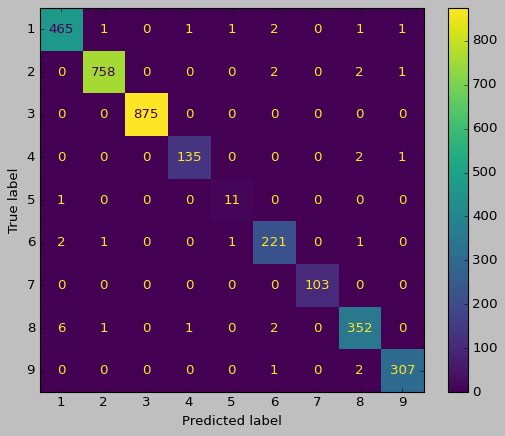

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred = clf.predict(x_val)
c = confusion_matrix(y_pred, y_val)

plt.figure(figsize = (40, 40), )
plot_confusion_matrix(clf, x_val, y_val, )
plt.show()